# **Australia vs World: Crop Yield, Production and Harvest Area with Special Focus on Wheat**

This project will analyse crop yield, production and harvest area for Australia compare to the rest of the world between 1961 and 2019. It will try to look for the potential reasons for why Australia crop yield differs from the rest of the world.  Potential factors such as average rainfall, use of fertilizers, harvest area, irrigated area and temperature changes will be investigated.    

Summary of contents:
1. Introduction
2. Summary
3. Data Inspection and Cleaning
4. Analysis and Answers to Questions
5. Conclusions and Discussion
6. Future Analysis 
7. References


## **1. Introduction**


I had the opportunity to visit my wife's MBA classmate then more than 10 years ago east of Perth.  This 27km2 of farm land is basically a mom and pop operation with seasonal outside help during harvest time.  The farm is equipped with modern GPS enabled tractors which could literally operate automatically.  Wheat is among the grains being produced.  He commented then that Australia has the lowest yielding crop in the world and suggested that the soil and rain might be the main reason.  I always ponder about this and so this is an exercise to validate that claim and to further investigate other potential reasons.

Most of the dataset comes from United Nations' Food Agricultural Organisation (FAO) and the rain fall data come from WorldBank.  The following questions will guide in giving us insight into Australia crop yield, production and harvest compared to the rest of the world with special focus on wheat.

**Questions to be answered:**

The following questions will be answered:

1. In 2019, what was the highest yielding crop (by weight/hectares), highest production (by weight) and area harvested (by hectares) in Australia?
2. How has the Australia top 10 crops (yield, production and harvest area) changes over time from 1961-2019?
3. For wheat in Australia, what is the relationship between area harvested to crop yield and production?
4. In 2019, what was the highest yielding crop (by weight/hectare), highest production (by weight) and area harvested (by hectares) produced in the world?
5. In 2019, if we consider just wheat, how does Australia yield, production and harvest area compared to the rest of the world?
6. In 2019, which countries produced the most total crops production per 10,000 people?
7. In 2019, who are the top crops producers in the world by total weight and what is the percentage?
8. How has the Australia rain fall averages changes over time from 1961-2019?  Is there relationship between crop production and rain fall?  How is Australia rainfall average compared to the rest of the world?
9. How has the Australia ferlizers usage changes over time from 1961-2019?  Is there relationship between crop production and ferlizers usage?
10. In Australia and the world, how has temperature changes over time from 1961-2019?  Is there relationship between crop production and temperature?
11. In 2018, how many and what percentage of the crop lands are actually irrigated in the world?


**Data Files**

This notebook uses the below seven data files. The key that links the files is Country Code (ISO3), Country Name and Year. The files will be inspected in detail in section 3 below, however a brief summary is also provided here. 

**Crop.csv**

File obtained from Food and Agriculture Organization (FAO) of the United Nations.  http://www.fao.org/faostat/en/#data/QC <br>
Main data columns include: 

* Country (Area)
* Country Code
* Years (as columns) (1961-2019)
* Item (170 Different crop types)
* Element (Area harvested, Yield and Production)

Values are Area harvest (hectares (ha)), Yield (hectogram/hectares (hg/ha).  (1 kg is equal to 10 hg) and Production in tonnes. 


**Population.csv**

File obtained from Food and Agriculture Organization (FAO) of the United Nations. http://www.fao.org/faostat/en/#data/OA <br>
Main data columns include: 

* Country (Area)
* Element (Total Population) with projection to year 2100. Final data cut to 2020.
* Years (as columns) (1961-2020) with values of total population. 

Values are total population in 1000 persons.

**Land.csv**

File obtained from Food and Agriculture Organization (FAO) of the United Nations. http://www.fao.org/faostat/en/#data/RL <br>
Main data columns include: 

* Country
* Type: Country area, Cropland and Copland area actually irrigated.
* Years (as columns) (1961-2018) with values in 1000 hectares unit.

Values are unit in 1000 hectares.

**Fertilizers.csv**

File obtained from Food and Agriculture Organization (FAO) of the United Nations
http://www.fao.org/faostat/en/#data/RFN <br>
Main data columns include: 

* Country
* Item (Total Nitrogen, Phosphate and Potash).
* Element (Agricultural Use)
* Year (1961-2019)
* Fertilizers quantity by weight in tonnes


**Rain.csv**

File obtained Worldbank for monthly average rainfall from 1961-2020.
https://climateknowledgeportal.worldbank.org/download-data (Arora, 2020). <br>
Main data columns include: 

* Country
* Country Code (ISO3)
* Year (1961-2020)
* Rainfall (in MM)

**Temperature.csv**

File obtained from Food and Agriculture Organization (FAO) of the United Nations
http://www.fao.org/faostat/en/#data/ET <br> 
Main data columns include: 

* Country
* Year (1961-2020)
* Temperature Change (in degree C)


**naturalearth_lowres**

Used in Q3 and available as part of the [Geopandas library](https://geopandas.org/mapping.html) (2013-2019) rather than as a separate file. A world map GeoDataFrame that allows visualisation of data based on country. 



## **2. Summary**

We have been taught from young that plants need room to grow, the right temperature, enough sun light, sufficient water, air, right amount of nutrients and time to grow (University of Illinois 2021).  Each crops need to a varying degree of each of these factors and in the right balance.  Large scale farming in multiple countries around the world has enable us to study the impact of each of these factors at play.

Rain turnout to be the key factors in influencing production and yield.  Since the croplands are tend to be in the hundred of thousands to  millions of hectares in size, we do need to rely on mother nature to supply the water for the plant.  Only some countries have the supplementary benefits of lakes and groundwater but some country like Australia doesn't enjoy this.

We seen all crops production increasing over time and this is certainly expected to meet with growing world population.  Usage of fertilizers generally flat or increase slightly over time with New Zealand and Ireland being the top users by tonnes per 10000 hectares.  

Lastly, the increasing temperature of about 1.5 degree C around the world from 1961-2019 is a worrying trend.  This might be a short term upward cycle in geologic timescale but certainly need concerted effort from every country to help arrest or slow it down.

## **3. Data Inspection & Cleaning**

In [1]:
# Start by importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas

%matplotlib inline

### **3.1 Crops Yield, Production & Harvest Area**
Since the dataset were large, the files were filter down so that the total 20MB maximum limit in Ed is met.

The first file was Production_Crops_E_All_Data_NOFLAG.csv which was >38MB in size.  The following was done in Jupyter Notebook to reduce the size to ~10MB.
1. Load the csv data.
2. Drop some columns (Areas Code, Item Code, Unit and Element Code).
3. Rename some columns (Item: Crop, Element: Type, and Area: Country).
4. Fill NaN with 0.
5. Delete some rows in Country representing regions.
6. Drop some rows in Crop column. These include other crops that had already been listed.
7. Filter data out less than 15000 hg/ha yield (in 2019) and output to new crop_yield_df.
8. Filter data out less than 15000 tonnes production (in 2019) and output to new crop_production_df.
9. Filter data out less than 100 ha area harvested (in 2019) and output to new crop_area_df.
10.  Merge all three dataframe and output to excel file ('Crop.csv').

The final data is yearly yield (hg/ha), production (tonnes) and harvest area (ha) per country from 1961-2019.

See the attached 01_datacleaning_Crop.ipynb to see the actual python code used with its saved output images. 


### **3.2 Population**

The second file was Population_E_All_Data_NOFLAG.csv which was 2.3MB in size.  The following was done in Jupyter Notebook to reduce the size to ~120KB.
1. Load the csv data.
2. Drop some columns (Areas Code, Item Code, Item, Element Code, Unit and Y1950 to Y1960 and Y2022 to 2100).
3. Rename some columns (Element: Type, and Area: Country).
4. Fill NaN with 0.
5. Delete some rows in Country representing regions.
6. Drop all rows except for Total Population - both (Male and Female combined).
7. Output to excel file ('Production.csv').

The final data is yearly total population (unit is 1000 persons) per country from 1961-2021.

See the attached 02_datacleaning_Production.ipynb to see the actual python code used with its saved output images.


### **3.3 Land Use**

The third file was Inputs_LandUse_E_All_Data_NOFLAG.csv which was 3.1MB in size.  The following was done in Jupyter Notebook to reduce the size to ~194KB.
1. Load the csv data.
2. Drop some columns (Areas Code, Item Code and Unit).
3. Rename some columns (Item: Type, and Area: Country).
4. Fill NaN with 0.
5. Delete some rows in Country representing regions.
6. Drop all rows except for Country area, Cropland and Cropland area actually irrigated under Type column.
7. Output to excel file ('Land.csv').

The final data is yearly country area, cropland and cropland area actually irrigated per country from 1961-2019.  Units are in 1000 ha.

See the attached 03_datacleaning_Land.ipynb to see the actual python code used with its saved output images. 


### **3.4 Fertilizers**

The fourth file was Inputs_FertilizersNutrient_E_All_Data_NOFLAG.csv which was 1.7MB in size. The following was done in Jupyter Notebook to reduce the size to ~216KB.

1. Load the csv data.
2. Drop some columns (Areas Code, Item Code, Element Code and Unit).
3. Rename some columns (Item: Fertilizer, and Area: Country).
4. Fill NaN with 0.
5. Delete some rows in Country representing regions.
6. Drop all rows except for Agricultural Use under Element column.  
7. Delete the Element column.
8. Replace the Fertilizers name to Nitrogen (N), Phosphate (P) and Potaash (K).
7. Output to excel file ('Fertilizers.csv').

The final data is yearly Nitrogen (N), Phosphate (P) and Potash (K) used for algricultural only per country from 1961-2019.  Units are in tonnes.

See the attached 04_datacleaning_Fertilizers.ipynb to see the actual python code used with its saved output images. 


### **3.5 Rainfall**

The fifth files were Worldbank_Rainfall_1961_1990_ed.csv and Worldbank_Rainfall_1991_2020_ed.csv which was 2.8MB in size each. The following was done in Jupyter Notebook to reduce the size to 193KB.

Prior to loading and cleaning in python, the original downloaded files had to be resaved as csv files in Excel. Correction were also made in Excel for the Country and ISO3 column for BHS, GMB, PRK, KOR and TZA.

1. Load the csv data.
2. Fill NaN with 0.
3. Do groupby Country, ISO3 and Year for mean rainfall in MM for both data.
4. Merge both dataframe.  
5. Rename the multi-index columns to a single index names.
6. Output to excel file ('Rain.csv').

The final data is yearly average rainfall in MM per country from 1961-2020.  Units are in MM.

See the attached 05_datacleaning_Rain.ipynb to see the actual python code used with its saved output images.

### **3.6 Temperature**

The six file was Environment_Temperature_change_E_All_Data_NOFLAG.csv which was 6.2MB in size. The following was done in Jupyter Notebook to reduce the size to 86KB.

1. Load the csv data.
2. Drop some columns (Area Code, Months Code, Element Code and Unit).
3. Change columns names (Element: Type and Area: Country).
4. Fill NaN with 0.
5. Delete regions rows.
6. Select all rows with column Months == 'Meteorological year'. 
7. Drop row with Type column = 'Standard Deviation'.
8. Drop columns of Months and Type.
9. Output to excel file ('Temperature.csv').  

The final data is yearly change of temperature in degree C per country from 1961-2020.

See the attached 06_datacleaning_Temperature.ipynb to see the actual python code used with its saved output images.

## **4.0 Analysis and Answers to Questions**

The following issues were discovered whilst working with the data.  They have been cleaned and corrected.

**New Countries Correction**

Some countries ceased to exist after certain time eg. Ethiopia PDR, USSR, Micronesia (Federated States of) and Sudan (former) so they have been deleted after loading them.  They are represented with their newer incarnation.

**Other Corrections**

* Dataset from FAO also listed the regions, groupings, neighbouring countries combined and not just countries.  All these except for individual countries had been deleted since we wanted to compare per country.  We have 192 unique countries.  United Nation have 193 members.  Tiny nation of Liechtenstein is not on the list.
* Under the Crops, some of the crops are grouped.  These had been deleted where appropiate so that no repeat.  We have 170 unique crops.
* Filling missing values in with 0 (where appropriate) and removing un-needed columns.
* China only is kept representing China mainland, Taiwan, Hong Kong and Macao.

Let's look at the now clean data.

#### **File 1- Crops Data**

In [2]:
# Import the clean crop dataset.
crop_df = pd.read_csv("Crop.csv")

In [3]:
# Have a quick look at the crop dataframe
print(crop_df.columns.is_unique)
print(crop_df.shape)
print(crop_df[crop_df.duplicated() == True])
crop_df.head()

True
(22191, 63)
Empty DataFrame
Columns: [Unnamed: 0, Country, Crop, Type, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Index: []

[0 rows x 63 columns]


,Unnamed: 0,Country,Crop,Type,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,Afghanistan,Apples,Yield,68018.0,68018.0,68018.0,78298.0,82258.0,83212.0,...,70000.0,70000.0,76519.0,76005.0,73000.0,68824.0,72762.0,65184.0,76527.0,90832.0
1,1,Afghanistan,Apricots,Yield,66390.0,66390.0,66390.0,76863.0,80819.0,81619.0,...,80000.0,81725.0,100000.0,99944.0,99944.0,96189.0,20819.0,72960.0,58934.0,73008.0
2,2,Afghanistan,Berries nes,Yield,88235.0,88235.0,88235.0,88235.0,88235.0,88235.0,...,78329.0,72734.0,65789.0,65789.0,65297.0,65684.0,63613.0,61918.0,60225.0,58532.0
3,3,Afghanistan,Figs,Yield,25000.0,25000.0,25000.0,28698.0,30252.0,30457.0,...,45000.0,40000.0,40126.0,40370.0,40000.0,32761.0,38755.0,48595.0,57275.0,68912.0
4,4,Afghanistan,"Fruit, citrus nes",Yield,67123.0,67123.0,67123.0,76923.0,81707.0,83333.0,...,100000.0,100000.0,100000.0,100000.0,100000.0,103400.0,108947.0,109653.0,111871.0,114081.0


In [4]:
print(crop_df['Crop'].value_counts())

Vegetables Primary         535
Roots and Tubers, Total    530
Cereals, Total             464
Vegetables, fresh nes      461
Potatoes                   420
                          ... 
Ramie                        5
Pyrethrum, dried             5
Brazil nuts, with shell      3
Tallowtree seed              3
Jojoba seed                  1
Name: Crop, Length: 170, dtype: int64


In [5]:
print(crop_df['Country'].value_counts())

China                         369
Mexico                        292
United States of America      267
Turkey                        261
Iran (Islamic Republic of)    244
                             ... 
Nauru                           8
Malta                           7
Tokelau                         7
Tuvalu                          6
Marshall Islands                5
Name: Country, Length: 192, dtype: int64



There are 170 different type of crops in 192 different countries with data from 1961-2019.  There are 193 member countries of UN.  The small nation of Liechtenstein is missing in this data.  So shouldn't affect the study.


#### **File 2- Population Data**

In [6]:
# Import the clean population dataset.
population_df = pd.read_csv("Population.csv")

In [7]:
# Have a quick look at the population dataframe
print(population_df.columns.is_unique)
print(population_df.shape)
print(population_df[population_df.duplicated() == True])
population_df.head()

True
(235, 62)
Empty DataFrame
Columns: [Country, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Index: []

[0 rows x 62 columns]


,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,9169.410,9351.441,9543.205,9744.781,9956.320,10174.836,10399.926,10637.063,10893.776,...,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921,38041.754,38928.346,39835.428
1,Albania,1685.936,1737.686,1790.573,1843.634,1896.171,1947.830,1998.740,2049.210,2099.729,...,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740,2880.917,2877.797,2872.933
2,Algeria,11336.339,11619.828,11912.803,12221.675,12550.885,12902.627,13275.026,13663.583,14061.722,...,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408,43053.054,43851.044,44616.624
3,American Samoa,20.602,21.253,22.034,22.854,23.672,24.462,25.248,25.989,26.703,...,55.667,55.713,55.791,55.812,55.741,55.620,55.465,55.312,55.191,55.100
4,Andorra,14.375,15.370,16.412,17.469,18.549,19.647,20.758,21.890,23.058,...,82.427,80.774,79.213,78.011,77.297,77.001,77.006,77.142,77.265,77.355


In [8]:
print(population_df['Country'].value_counts())

Afghanistan         1
Papua New Guinea    1
Nicaragua           1
Niger               1
Nigeria             1
                   ..
Gibraltar           1
Greece              1
Greenland           1
Grenada             1
Zimbabwe            1
Name: Country, Length: 235, dtype: int64



There are 238 different countries with data from 1961-2019.  There are more countries listed here than the crop data because it is also including pieces of land under jurisdiction by other countries.


#### **File 3- Land Data**

In [9]:
# Import the clean land dataset.
land_df = pd.read_csv("Land.csv")

In [10]:
# Have a quick look at the land dataframe
print(land_df.columns.is_unique)
print(land_df.shape)
print(land_df[land_df.duplicated() == True])
land_df.head()

True
(515, 60)
Empty DataFrame
Columns: [Country, Type, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
Index: []

[0 rows x 60 columns]


,Country,Type,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,Country area,65286.0,65286.0,65286.0,65286.0,65286.0,65286.0,65286.0,65286.0,...,65286.0,65286.0,65286.0,65286.0,65286.00,65286.0,65286.0,65286.0,65286.0,65286.0
1,Afghanistan,Cropland,7700.0,7760.0,7810.0,7873.0,7875.0,7913.0,7979.0,7980.0,...,7910.0,7911.0,7910.0,7910.0,7910.00,7910.0,7910.0,7910.0,7910.0,7919.0
2,Albania,Country area,2875.0,2875.0,2875.0,2875.0,2875.0,2875.0,2875.0,2875.0,...,2875.0,2875.0,2875.0,2875.0,2875.00,2875.0,2875.0,2875.0,2875.0,2875.0
3,Albania,Cropland,479.0,487.0,495.0,501.0,522.0,540.0,556.0,570.0,...,696.0,696.0,696.0,696.0,696.30,696.0,696.1,703.5,691.1,696.0
4,Albania,Cropland area actually irrigated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,202.0,204.5,204.3,204.7,205.26,149.8,158.0,169.0,171.0,176.0


In [11]:
print(land_df['Country'].value_counts())

Jordan                              3
Cyprus                              3
Kenya                               3
Tajikistan                          3
Syrian Arab Republic                3
                                   ..
Greenland                           1
Bonaire, Sint Eustatius and Saba    1
Norfolk Island                      1
Pitcairn                            1
Saint-Martin (French part)          1
Name: Country, Length: 238, dtype: int64


There are 240 different countries with data from 1961-2019.  Similarly this dataset includes pieces of land under jurisdiction by other countries.

#### **File 4- Fertilizers Data**

In [12]:
# Import the clean fertilizers dataset.
fertilizers_df = pd.read_csv("Fertilizers.csv")

In [13]:
# Have a quick look at the fertilizers dataframe
print(fertilizers_df.columns.is_unique)
print(fertilizers_df.shape)
print(fertilizers_df[fertilizers_df.duplicated() == True])
fertilizers_df.head()

True
(498, 61)
Empty DataFrame
Columns: [Country, Fertilizer, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Index: []

[0 rows x 61 columns]


,Country,Fertilizer,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,Nitrogen (N),1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,9000.0,14000.0,...,12929.01,22970.63,17065.25,34903.79,73872.84,21075.57,96670.85,140775.85,46613.50,59702.92
1,Afghanistan,Phosphate (P),100.0,100.0,100.0,100.0,100.0,500.0,1000.0,1000.0,...,925.85,6845.57,1261.44,3020.03,5121.35,10146.92,8991.27,16656.69,12319.04,25761.88
2,Afghanistan,Potash (K),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,196.78,88.11,6.67,9.90,71.73,31.48,0.62,0.00
3,Albania,Nitrogen (N),3187.0,2000.0,2000.0,2000.0,2000.0,3000.0,7000.0,19000.0,...,31292.44,36892.70,34944.13,30711.91,30711.76,36803.92,42896.08,39184.92,24769.07,38329.56
4,Albania,Phosphate (P),2433.0,2500.0,2500.0,3500.0,5000.0,5000.0,7000.0,16000.0,...,21633.44,23341.22,22165.38,22906.47,22906.54,28725.33,34544.12,21263.69,13358.07,15087.82


In [14]:
print(fertilizers_df['Country'].value_counts())

Afghanistan         3
Nepal               3
New Caledonia       3
New Zealand         3
Nicaragua           3
                   ..
France              3
French Polynesia    3
Gabon               3
Gambia              3
Zimbabwe            3
Name: Country, Length: 166, dtype: int64



There are 169 different countries with data from 1961-2019.  This is the least number of countries listed so far.


#### **File 5- Rainfall Data**

In [15]:
# Import the clean rainfall dataset.
rain_df = pd.read_csv("Rain.csv", index_col=0)

In [16]:
# Have a quick look at the land dataframe
print(rain_df.columns.is_unique)
print(rain_df.shape)
print(rain_df[rain_df.duplicated() == True])
rain_df.head()

True
(198, 62)
Empty DataFrame
Columns: [Country, Country Code, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Index: []

[0 rows x 62 columns]


,Country,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,AFG,27.675000,21.458333,27.125000,26.700000,29.875000,23.575000,30.066667,27.766667,...,25.666667,29.641667,29.508333,24.108333,32.433333,29.375000,23.191667,21.325000,30.641667,31.358333
1,Albania,ALB,73.408333,103.791667,106.000000,89.450000,76.100000,99.483333,79.208333,93.983333,...,65.458333,85.441667,88.300000,112.600000,87.366667,95.483333,83.825000,78.691667,99.500000,84.266667
2,Algeria,DZA,5.150000,8.016667,7.966667,7.000000,6.658333,6.416667,7.116667,6.375000,...,8.033333,6.958333,7.416667,6.200000,6.250000,5.641667,6.008333,7.766667,6.233333,4.866667
3,Andorra,AND,63.641667,92.341667,102.008333,83.066667,80.925000,77.858333,62.908333,84.258333,...,71.516667,58.066667,84.550000,86.716667,61.708333,65.716667,64.958333,101.291667,77.283333,79.308333
4,Angola,AGO,97.516667,89.633333,88.166667,76.008333,78.450000,89.350000,95.466667,88.725000,...,83.508333,84.725000,81.858333,83.891667,79.500000,81.400000,83.641667,83.566667,84.125000,84.716667


In [17]:
print(rain_df['Country'].value_counts())

 Afghanistan      1
 New Caledonia    1
 Nicaragua        1
 Niger            1
 Nigeria          1
                 ..
 Ghana            1
 Greece           1
 Greenland        1
 Grenada          1
South Korea       1
Name: Country, Length: 198, dtype: int64



There are 198 different countries with data from 1961-2020.  


#### **File 6- Temperature Data**

In [18]:
# Import the clean temperature dataset.
temperature_df = pd.read_csv("Temperature.csv")

In [19]:
# Have a quick look at the temperature dataframe
print(temperature_df.columns.is_unique)
print(temperature_df.shape)
print(temperature_df[temperature_df.duplicated() == True])
temperature_df.head()

True
(238, 61)
Empty DataFrame
Columns: [Country, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Index: []

[0 rows x 61 columns]


,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,-0.121,-0.171,0.841,-0.779,-0.254,0.172,-0.374,-0.375,-0.490,...,1.463,0.283,1.325,0.536,1.166,1.581,1.626,1.682,1.125,0.652
1,Albania,0.639,0.345,0.078,-0.166,-0.388,0.553,-0.082,0.073,-0.024,...,1.133,1.577,1.431,1.357,1.703,1.624,1.286,2.189,1.858,1.671
2,Algeria,0.110,0.042,0.005,0.169,-0.176,0.373,-0.020,-0.062,0.325,...,1.427,1.184,1.211,1.715,1.151,1.776,1.537,1.246,1.127,1.943
3,American Samoa,0.042,-0.080,0.128,-0.178,-0.526,0.218,-0.342,-0.172,0.147,...,0.711,0.732,1.016,0.887,0.726,1.256,1.151,0.905,1.255,1.161
4,Andorra,0.744,0.117,-0.746,0.315,-0.499,0.406,0.620,-0.013,-0.171,...,1.586,1.179,0.748,1.868,1.564,1.845,1.784,1.760,1.800,2.378


In [20]:
print(temperature_df['Country'].value_counts())

Afghanistan         1
Papua New Guinea    1
Niger               1
Nigeria             1
Niue                1
                   ..
Gibraltar           1
Greece              1
Greenland           1
Grenada             1
Zimbabwe            1
Name: Country, Length: 238, dtype: int64



There are 240 different countries with data from 1961-2019.  


After cleaning, these data looks pretty good. The columns are unique, there are no duplicated rows and we know the size of the dataframe. The number of countries in each dataset differ slightly due to addition or omission of land under other countries jurisdiction.

We are ready to answer the questions.

### **4.1 Answer Question 1: In 2019, what was the highest yielding crop (by weight/hectare), highest production (by weight) and area harvested (by hectares) in Australia?**

In [21]:
# create a subset from crop_df for Australia crops only
australia_crop_df = crop_df[np.isin(crop_df, ['Australia']).any(axis=1)].reset_index()


In [22]:
# Select Type == 'Yield' and 2019 for all crops
result1_df = australia_crop_df[(australia_crop_df["Type"] == 'Yield')][['Country', 'Crop', 'Type', '2019']]
result1_df

,Country,Crop,Type,2019
0,Australia,"Almonds, with shell",Yield,38628.0
1,Australia,Apples,Yield,159614.0
2,Australia,Apricots,Yield,18616.0
3,Australia,Asparagus,Yield,51064.0
4,Australia,Avocados,Yield,47212.0
...,...,...,...,...
58,Australia,"Cereals, Total",Yield,17687.0
59,Australia,"Citrus Fruit, Total",Yield,201025.0
60,Australia,"Roots and Tubers, Total",Yield,377139.0
61,Australia,"Treenuts, Total",Yield,20855.0


   index    Country                             Crop   Type       2019
0     31  Australia           Mushrooms and truffles  Yield  3605926.0
1     54  Australia                         Tomatoes  Yield   769490.0
2     50  Australia                       Sugar cane  Yield   748356.0
3     12  Australia              Carrots and turnips  Yield   620795.0
4     33  Australia                      Onions, dry  Yield   545359.0
5     56  Australia                      Watermelons  Yield   456618.0
6     42  Australia                         Potatoes  Yield   378019.0
7     60  Australia          Roots and Tubers, Total  Yield   377139.0
8     51  Australia                   Sweet potatoes  Yield   363976.0
9     30  Australia  Melons, other (inc.cantaloupes)  Yield   328782.0


C:\Users\GPEL_HPENVY\anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


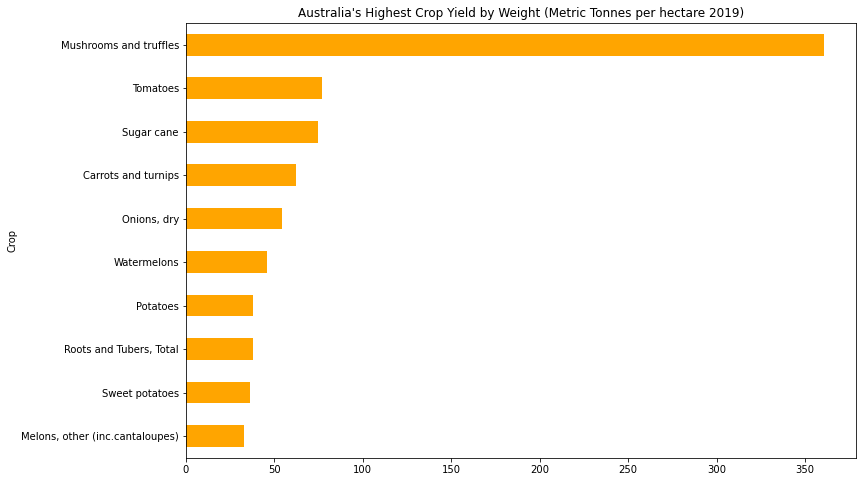

In [23]:
# Sort the result in descending order using 2019 column.
result1_df = result1_df.sort_values(
    by = ['2019'],
    ascending = [False] ,
).reset_index()
# Consider just the top 10 crop yield.
result1a_df = result1_df.iloc[0:10,:]
print(result1a_df.head(10))

#Plot the result
# Yield data are recorded in hectogramme (100 grammes) per hectare (HG/HA).
# Change yield unit to Metric Tonnes per hectare.
result1a_df['2019'] = result1a_df['2019'].apply(lambda x: x / 10000)
result1a_df = result1a_df.sort_values(by = ['2019'], ascending = [True] ,)
result1a_df = result1a_df.set_index('Crop')

axes = result1a_df['2019'].plot(
    kind='barh',
    x = 'Crop',
    figsize=[12, 8],
    title='Australia\'s Highest Crop Yield by Weight (Metric Tonnes per hectare 2019)',
    color='orange'
)

**Answer 1a**

Australia number one yielding crop is Mushrooms and truffles at over 360 tonnes per hectare.  Surpising as I didn't expected this result.  Wheat and maize are not even in the top 10.  Let's check their position.

In [24]:
# These numbers are in Tonnes (only top 10 was divided by 10000)
print(result1_df[(result1_df["Crop"] == 'Wheat') | (result1_df["Crop"] == 'Maize')])

    index    Country   Crop   Type     2019
38     27  Australia  Maize  Yield  55507.0
61     57  Australia  Wheat  Yield  16917.0


The numbers here had not been divided by 10000 since only the top 10 were.  So it is still in HG/HA unit.
Maize is at no. 37 with 5.5 tonnes per hectares while wheat is at no. 60 with 1.6 tonnes per hectares.

Let's look at the production and harvest area.

In [25]:
# Select just the Type == "Production".
result2_df = australia_crop_df[(australia_crop_df["Type"] == 'Production')][['Country', 'Crop', 'Type', '2019']]
result2_df

,Country,Crop,Type,2019
63,Australia,"Almonds, with shell",Production,146410.0
64,Australia,Apples,Production,265150.0
65,Australia,Avocados,Production,79533.0
66,Australia,Bananas,Production,310160.0
67,Australia,Barley,Production,8818946.0
...,...,...,...,...
119,Australia,"Oilcrops, Oil Equivalent",Production,1096175.0
120,Australia,"Pulses, Total",Production,1915344.0
121,Australia,"Roots and Tubers, Total",Production,1304184.0
122,Australia,"Treenuts, Total",Production,194627.0


   index    Country                       Crop        Type        2019
0    108  Australia                 Sugar cane  Production  32415352.0
1    116  Australia             Cereals, Total  Production  29238704.0
2    115  Australia                      Wheat  Production  17597561.0
3     67  Australia                     Barley  Production   8818946.0
4    101  Australia                   Rapeseed  Production   2365839.0
5    118  Australia  Oilcrops, Cake Equivalent  Production   1970127.0
6    120  Australia              Pulses, Total  Production   1915344.0
7    123  Australia         Vegetables Primary  Production   1736243.0
8    104  Australia                Seed cotton  Production   1627062.0
9     77  Australia                     Grapes  Production   1553602.0


C:\Users\GPEL_HPENVY\anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


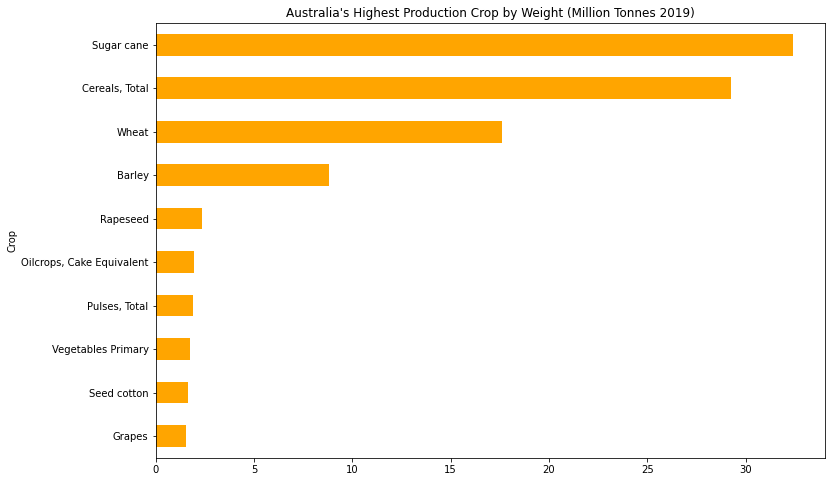

In [26]:
# Sort by 2019 in descending order.
result2_df = result2_df.sort_values(
    by = ['2019'],
    ascending = [False] ,
).reset_index()
# Consider just the top 10 crop production.
result2a_df = result2_df.iloc[0:10,:]
print(result2a_df.head(10))

#Plot the result
# Production data are recorded in Tonnes.
# Change total production unit to Million Tonnes.
result2a_df['2019'] = result2a_df['2019'].apply(lambda x: x / 1000000)
result2a_df = result2a_df.sort_values(by = ['2019'], ascending = [True] ,)
result2a_df = result2a_df.set_index('Crop')

axes = result2a_df['2019'].plot(
    kind='barh',
    x = 'Crop',
    figsize=[12, 8],
    title='Australia\'s Highest Production Crop by Weight (Million Tonnes 2019)',
    color='orange'
)

**Answer 1b**

Australia no.1 crop production in 2019 is sugar cane at 32.4 million tonnes followed by Cereals at 29.2 million tonnes.  Wheat showed up as no. 3 at 17.6 million tonnes.  What about the top yielding crops?

In [27]:
# Maize production is not divided by 1000000 like Wheat.
print(result2_df[(result2_df["Crop"] == 'Wheat') | (result2_df["Crop"] == 'Maize') |(result2_df["Crop"] == 'Mushrooms and truffles') ])

    index    Country                    Crop        Type           2019
2     115  Australia                   Wheat  Production      17.597561
20     82  Australia                   Maize  Production  327206.000000
50     87  Australia  Mushrooms and truffles  Production   48680.000000


Mushrooms and truffles only produce less than 50 thousand tonnes in 2019 suggesting that the area harvest is probably very small.

In [28]:
# Selecting just the Type == 'Area harvested'
result3_df = australia_crop_df[(australia_crop_df["Type"] == 'Area harvested')][['Country', 'Crop', 'Type', '2019']]
result3_df

,Country,Crop,Type,2019
124,Australia,"Almonds, with shell",Area harvested,37903.0
125,Australia,"Anise, badian, fennel, coriander",Area harvested,1182.0
126,Australia,Apples,Area harvested,16612.0
127,Australia,Apricots,Area harvested,4500.0
128,Australia,Asparagus,Area harvested,1504.0
...,...,...,...,...
203,Australia,"Oilcrops, Oil Equivalent",Area harvested,2501384.0
204,Australia,"Pulses, Total",Area harvested,1661512.0
205,Australia,"Roots and Tubers, Total",Area harvested,34581.0
206,Australia,"Treenuts, Total",Area harvested,93323.0


   index    Country                       Crop            Type        2019
0    199  Australia             Cereals, Total  Area harvested  16530732.0
1    198  Australia                      Wheat  Area harvested  10402271.0
2    131  Australia                     Barley  Area harvested   4436588.0
3    203  Australia   Oilcrops, Oil Equivalent  Area harvested   2501384.0
4    202  Australia  Oilcrops, Cake Equivalent  Area harvested   2465420.0
5    177  Australia                   Rapeseed  Area harvested   2119836.0
6    204  Australia              Pulses, Total  Area harvested   1661512.0
7    163  Australia                       Oats  Area harvested    938129.0
8    183  Australia                    Sorghum  Area harvested    550279.0
9    155  Australia                     Lupins  Area harvested    484240.0


C:\Users\GPEL_HPENVY\anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


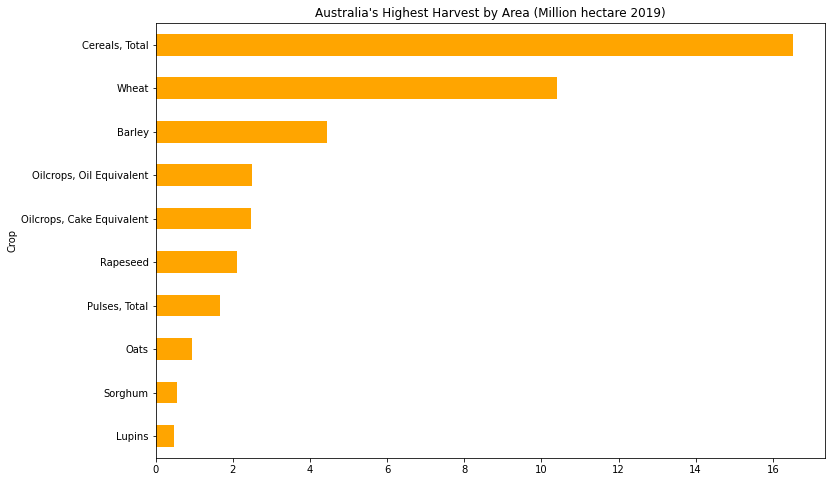

In [29]:
# Sorting with 2019 column in descending order.
result3_df = result3_df.sort_values(
    by = ['2019'],
    ascending = [False] ,
).reset_index()
# Consider just the top 10 crop harvest area.
result3a_df = result3_df.iloc[0:10,:]
print(result3a_df.head(10))

#Plot the result
# Area harvested are recorded in hectacres.
# Change area harvested unit to Million hectare.
result3a_df['2019'] = result3a_df['2019'].apply(lambda x: x / 1000000)
result3a_df = result3a_df.set_index('Crop')
result3a_df = result3a_df.sort_values(by = ['2019'], ascending = [True] ,)
axes = result3a_df['2019'].plot(
    kind='barh',
    x = 'Crop',
    figsize=[12, 8],
    title='Australia\'s Highest Harvest by Area (Million hectare 2019)',
    color='orange'
)

**Answer 1c**

Cereal is the no.1 crop by harvest area in 2019 with 16.5 million hectares used for cultivation.  Wheat is no. 2 at 10.4 million hectares.  The other crops drop significantly after that to around 0.5-4 million range.  What about mushrooms and truffles?

In [30]:
# These numbers are not divided by 1000000.  Only the top 10 was divided by 100000.
print(result3_df[(result3_df["Crop"] == 'Mushrooms and truffles') | (result3_df["Crop"] == 'Tomatoes') | (result3_df["Crop"] == 'Sugar Crops Primary')])

    index    Country                    Crop            Type    2019
58    192  Australia                Tomatoes  Area harvested  4278.0
83    161  Australia  Mushrooms and truffles  Area harvested   135.0


As expected the area harvested is 135 hectares for mushrooms and truffles at no.82 while tomatoes is at 4278 hectares sitting at no. 57.

This actually does make sense, since the area of harvest is so small and knowing how mushrooms, truffles and tomatoes are cultivated, they do get lots of controlled environment to grow and hence explaining why they are top yielding crops.

So if a country has limited area to cultivate it is good idea to grow these crops.

### **4.2 Answer Question 2: How has the Australia top 10 crops (yield, production and harvest area) changes over time from 1961-2019?**

Crop  Mushrooms and truffles  Tomatoes  Sugar cane  Carrots and turnips  \
1961                     0.0  203614.0    621661.0             249535.0   
1962                     0.0  203614.0    796258.0             267184.0   
1963                     0.0  196280.0    728636.0             269133.0   
1964                     0.0  208483.0    804411.0             281193.0   
1965                     0.0  226531.0    706275.0             287534.0   
1966                     0.0  240044.0    752092.0             307984.0   
1967                     0.0  244085.0    760636.0             276689.0   
1968                     0.0  222943.0    813221.0             281748.0   
1969                     0.0  221648.0    741795.0             278171.0   
1970                     0.0  225671.0    800142.0             278259.0   

Crop  Onions, dry  Watermelons  Potatoes  Roots and Tubers, Total  \
1961     155576.0      97633.0  123285.0                 123049.0   
1962     155576.0      97633.0  1398

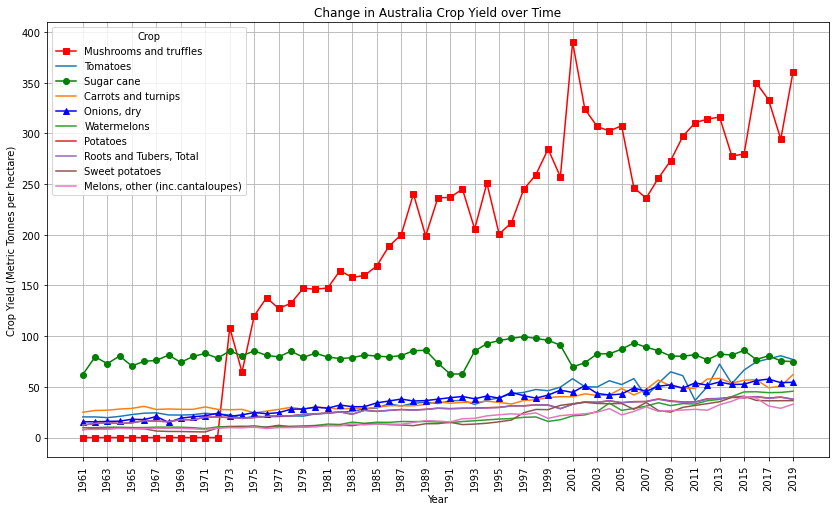

In [31]:
# Select only yield data.
australia_crop_yield_df = australia_crop_df[(australia_crop_df["Type"] == 'Yield')]

# Remove columns that are not required
australia_crop_yield_df = australia_crop_yield_df.drop(['index','Country', 'Type',], axis=1)
result1_df = australia_crop_yield_df.sort_values(
    by = ['2019'],
    ascending = [False] ,
).reset_index()

# Set index to Crop, tranposing and drop index column.
result1_df = result1_df.set_index('Crop')
result1_df = result1_df.T
result1_df = result1_df.drop('index')

# Selecting all rows from 2nd row onwards for top 10.
result1a_df = result1_df.iloc[1: , 0:10]
print(result1a_df.head(10))

#Plot the result
# Yield data are recorded in hectogramme (100 grammes) per hectare (HG/HA).
# Change yield unit to Metric Tonnes per hectare.
result1a_df = result1a_df.apply(lambda x: x / 10000)

axes = result1a_df.plot(
    kind='line',
    subplots=False,
    title='Change in Australia Crop Yield over Time',
    xlabel='Year',
    ylabel='Crop Yield (Metric Tonnes per hectare)',
    grid = True,
    rot = 90,
    xticks = [x for x in range(0, 60, 2)],
    style = ['rs-','-','go-','-','b^-'],
    figsize=(14,8)
)

**Answer 2a**

Mushrooms and truffles production only started in 1972 and had continue to grow in terms of yield yearly.  Sugar cane shows fairly flat growth while the other top 10 show steady yield over time albeit slowly in comparison to mushrooms and truffles.

Crop  Sugar cane  Cereals, Total       Wheat     Barley  Rapeseed  \
1961   9730296.0       9149882.0   6727192.0   941304.0       0.0   
1962  12940301.0      11143648.0   8352912.0   897655.0       0.0   
1963  12312569.0      11812267.0   8924460.0   984200.0       0.0   
1964  15312357.0      13001568.0  10036954.0  1118465.0       0.0   
1965  14382227.0       9684056.0   7067060.0   948822.0       0.0   
1966  16952688.0      16585035.0  12699257.0  1396808.0       0.0   
1967  17025232.0       9873734.0   7546691.0   834580.0       0.0   
1968  18708304.0      18905065.0  14804143.0  1646296.0     508.0   
1969  15784354.0      14250318.0  10546200.0  1698732.0    4470.0   
1970  17644816.0      12904533.0   7889918.0  2351000.0   33630.0   

Crop  Oilcrops, Cake Equivalent  Pulses, Total  Vegetables Primary  \
1961                    21441.0        22644.0            641089.0   
1962                    26148.0        24332.0            656717.0   
1963                    32097.

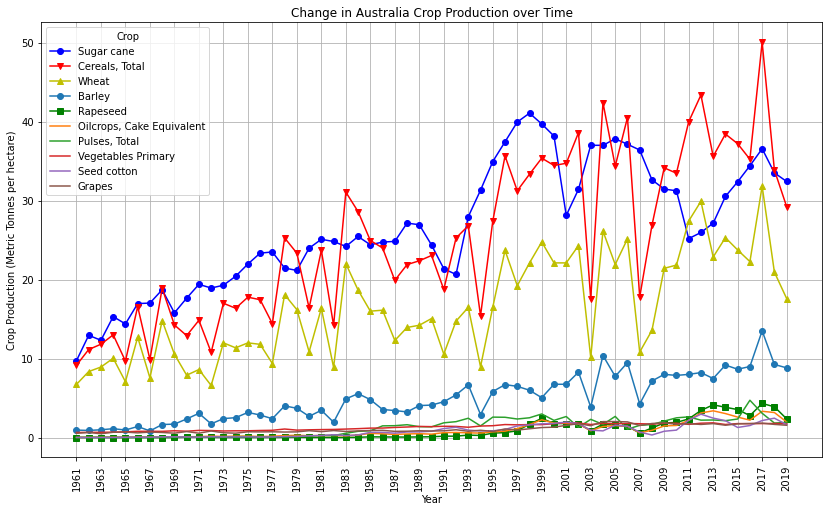

In [32]:
# Select only crop production.
australia_crop_production_df = australia_crop_df[(australia_crop_df["Type"] == 'Production')]

# Remove columns that are not required
australia_crop_production_df = australia_crop_production_df.drop(['index','Country', 'Type',], axis=1)
result2_df = australia_crop_production_df.sort_values(
    by = ['2019'],
    ascending = [False] ,
).reset_index()

# Set index to Crop, tranposing and drop index column.
result2_df = result2_df.set_index('Crop')
result2_df = result2_df.T
result2_df = result2_df.drop('index')

# Selecting all rows from 2nd row onwards for top 10.
result2a_df = result2_df.iloc[1: , 0:10]
print(result2a_df.head(10))

# Production data are recorded in Tonnes.
# Change total production units to Million Tonnes per hectare.
result2a_df = result2a_df.apply(lambda x: x / 1000000)

ax = result2a_df.plot(
    kind='line',
    title='Change in Australia Crop Production over Time',
    xlabel='Year',
    ylabel='Crop Production (Metric Tonnes per hectare)',
    grid = True,
    rot = 90,
    xticks = [x for x in range(0, 60, 2)],
    style = ['bo-','rv-','y^-','o-','gs-'],
    figsize=(14,8)
)

**Answer 2b**

Generally, Australia crop production increases over time and highly fluctuating in certain years.  There is significant dip in almost all production in 1982, 1991, 1994, 2003, 2007, 2013, 2016 and 2019.  Why is this?  Since it is affecting almost all, it must be regional phenomena.  Searching the news on web suggest these drop coincides with severe drought during those time (Wahlquist 2019).  It is so bad that Australia become net importer for those crops at that time. We will check the rainfall plot to confirm this in Q7.

Crop  Cereals, Total       Wheat     Barley  Oilcrops, Oil Equivalent  \
1961       8441623.0   5958110.0   964512.0                   66032.0   
1962       9154626.0   6664679.0   820498.0                   70620.0   
1963       9191184.0   6666676.0   814765.0                   92033.0   
1964       9822032.0   7251495.0   835306.0                  114102.0   
1965       9846764.0   7087977.0   929849.0                   74729.0   
1966      11504354.0   8426760.0  1010784.0                  106576.0   
1967      11884253.0   9081640.0  1056818.0                  120371.0   
1968      14121516.0  10845345.0  1340995.0                  114305.0   
1969      12781700.0   9485958.0  1521163.0                  146618.0   
1970      10598124.0   6478418.0  2000057.0                  210160.0   

Crop  Oilcrops, Cake Equivalent  Rapeseed  Pulses, Total       Oats   Sorghum  \
1961                    64944.0       0.0        26177.0  1253152.0  103238.0   
1962                    69602.0   

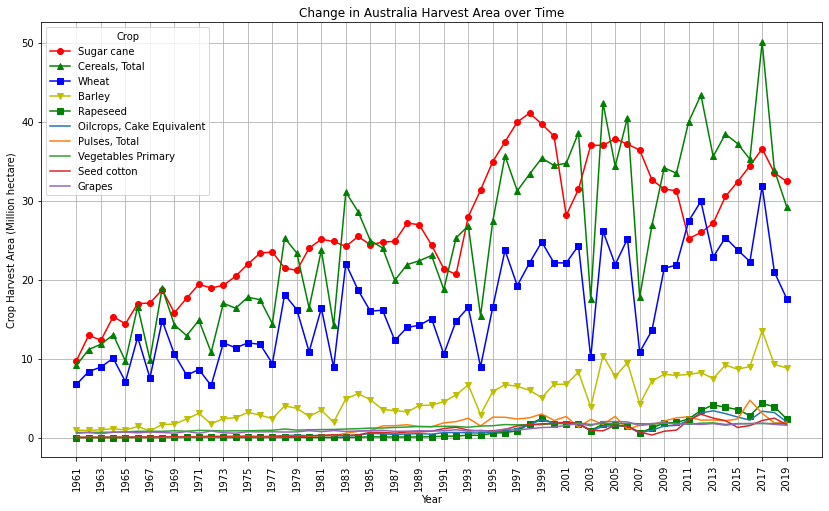

In [33]:
# Selecting area harvested data.
australia_crop_area_df = australia_crop_df[(australia_crop_df["Type"] == 'Area harvested')]

# Remove columns that are not required
australia_crop_area_df = australia_crop_area_df.drop(['index','Country', 'Type',], axis=1)
result3_df = australia_crop_area_df.sort_values(
    by = ['2019'],
    ascending = [False] ,
).reset_index()

# Set index to Crop, tranposing and drop index column.
result3_df = result3_df.set_index('Crop')
result3_df = result3_df.T
result3_df = result3_df.drop('index')

# Selecting all rows from 2nd row onwards.
result3a_df = result3_df.iloc[1: , 0:10]
print(result3a_df.head(10))

#Plot the result
# Area harvested are recorded in hectacres.
# Change total production units to Million hectare.
result3a_df = result3a_df.apply(lambda x: x / 1000000)

axes = result2a_df.plot(
    kind='line',
    subplots=False,
    title='Change in Australia Harvest Area over Time',
    xlabel='Year',
    ylabel='Crop Harvest Area (Million hectare)',
    grid = True,
    rot = 90,
    xticks = [x for x in range(0, 60, 2)],
    style = ['ro-','g^-','bs-','yv-','gs-'],
    figsize=(14,8)
)

**Answer 2c**

This plot look very similar to the production plot prior, suggesting very close link.  It is surprising to note that area harvest fluctuates over times especially for the top four crops.  We will plot scatter plot to confirm the relationship in Q3.

We select one crop (Wheat) to demonstrate this relationship.

### **4.3 Answer Question 3: For wheat in Australia, what is the relationship between area harvested to crop yield and production?**

Type          Yield  Production  Area harvested
index          57.0       115.0           198.0
Unnamed: 0    341.0      7730.0         13604.0
1961        11291.0   6727192.0       5958110.0
1962        12533.0   8352912.0       6664679.0
1963        13387.0   8924460.0       6666676.0
1964        13841.0  10036954.0       7251495.0
1965         9970.0   7067060.0       7087977.0
1966        15070.0  12699257.0       8426760.0
1967         8310.0   7546691.0       9081640.0
1968        13650.0  14804143.0      10845345.0
Type    Yield  Production  Area harvested
1962  12533.0   8352912.0       6664679.0
1963  13387.0   8924460.0       6666676.0
1964  13841.0  10036954.0       7251495.0
1965   9970.0   7067060.0       7087977.0
1966  15070.0  12699257.0       8426760.0
1967   8310.0   7546691.0       9081640.0
1968  13650.0  14804143.0      10845345.0
1969  11118.0  10546200.0       9485958.0
1970  12179.0   7889918.0       6478418.0
1971  12057.0   8606000.0       7137852.0


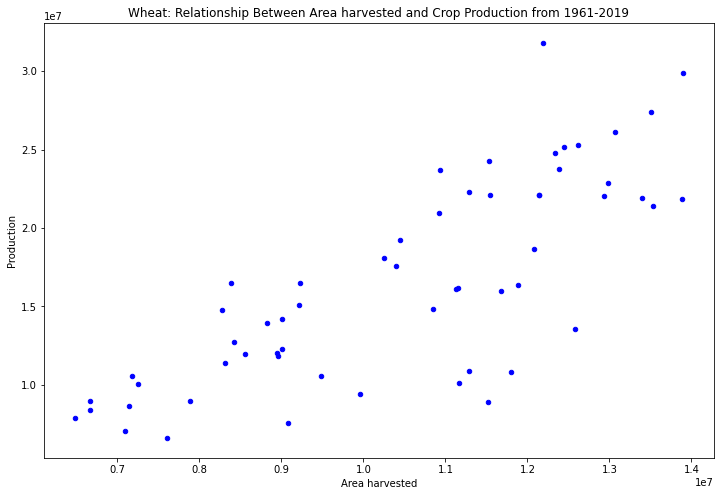

In [34]:
# Selecting Wheat crop only for Australia.
australia_crop_wheat_df = australia_crop_df[(australia_crop_df["Crop"] == 'Wheat')]

# Remove columns that are not required
australia_crop_wheat_df = australia_crop_wheat_df.drop(['index','Country', 'Crop',], axis=1)
result1_df = australia_crop_wheat_df.reset_index()
result1_df = result1_df.set_index('Type')

# Set index to Crop, tranposing and drop index column.
result1_df = result1_df.T
print(result1_df.head(10))
result1_df = result1_df.drop('index')

# Changing the data to numeric type.  Will replace all non-numeric values with NaN.
result1_df['Production'] = pd.to_numeric(result1_df['Production'], errors='coerce')
result1_df['Yield'] = pd.to_numeric(result1_df['Yield'], errors='coerce')
result1_df['Area harvested'] = pd.to_numeric(result1_df['Area harvested'], errors='coerce')

# Selecting all rows from 3rd row onwards
result1_df = result1_df.iloc[2: , :]

print(result1_df.head(10))

#Plot the result of area harvested vs production.
axes = result1_df.plot(
    kind='scatter',
    x = 'Area harvested',
    y = 'Production',
    figsize=[12, 8],
    color='blue',
    title='Wheat: Relationship Between Area harvested and Crop Production from 1961-2019'
)

In [35]:
# Get the correlation between the production and area harvested.
my_correlation = result1_df['Area harvested'].corr(result1_df['Production'])
my_correlation

0.7818191761875873

**Answer 3a**

The scatter plot suggest there is close correlation (0.78) between production and area harvested.  The data suggest that the greater the area harvested the greater the production will be which makes perfect sense.

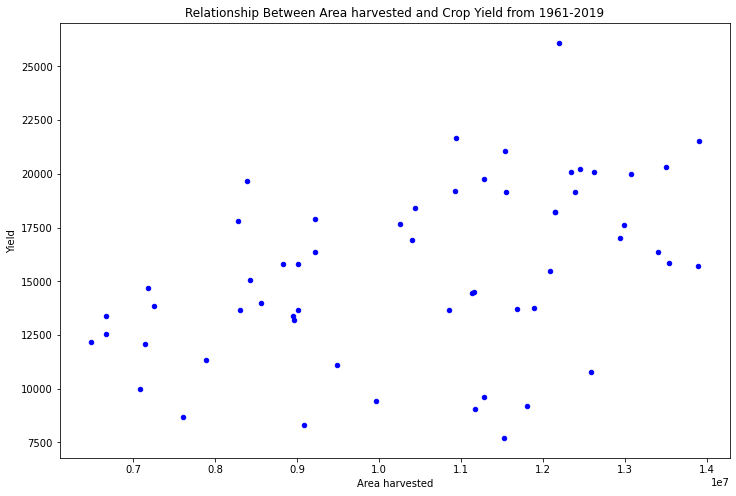

In [36]:
# Plotting the scatter plot between are harvested and yield.
axes = result1_df.plot(
    kind='scatter',
    x = 'Area harvested',
    y = 'Yield',
    figsize=[12, 8],
    color='blue',
    title='Relationship Between Area harvested and Crop Yield from 1961-2019'
)

In [37]:
# Get the correlation between the production and area harvested.
my_correlation = result1_df['Area harvested'].corr(result1_df['Yield'])
my_correlation

0.43975157401461845

**Answer 3b**

The scatter plot suggest that there is a weak relationship (correlation = 0.43) between area harvested and yield.  A bigger area harvested doesn't necessarily would yield better harvest.

### **4.4 Answer Question 4: In 2019, what was the highest yielding crop (by weight/hectare), highest production (by weight) and area harvested (by hectares) produced in the world?**

In [38]:
# Selecting Type yield for year 2019 only for all countries.
crop_world_yield_df = crop_df[(crop_df["Type"] == 'Yield')].reset_index()

# Selecting the needed columns.
crop_2019_world_yield_df = crop_world_yield_df.loc[:, ['Country','Crop', '2019']]

#Set index to Country
crop_2019_world_yield_df = crop_2019_world_yield_df.set_index('Country')

# Sorting descending order.
crop_2019_world_yield_df = crop_2019_world_yield_df.sort_values(
    by = '2019',
    ascending = False,
).reset_index()
crop_2019_world_yield_df.head(10)

,Country,Crop,2019
0,Netherlands,Mushrooms and truffles,50000000.0
1,Belgium,Mushrooms and truffles,28000000.0
2,Poland,Mushrooms and truffles,12080000.0
3,Netherlands,Cucumbers and gherkins,6837500.0
4,Iceland,Cucumbers and gherkins,6413333.0
5,Belgium,Eggplants (aubergines),5290000.0
6,United Kingdom of Great Britain and Northern I...,Cucumbers and gherkins,5200000.0
7,Netherlands,Tomatoes,5055556.0
8,Netherlands,Eggplants (aubergines),4923077.0
9,Belgium,Tomatoes,4739298.0


C:\Users\GPEL_HPENVY\anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\GPEL_HPENVY\anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


                                             Country                    Crop  \
0                                        Netherlands  Mushrooms and truffles   
1                                            Belgium  Mushrooms and truffles   
2                                             Poland  Mushrooms and truffles   
3                                        Netherlands  Cucumbers and gherkins   
4                                            Iceland  Cucumbers and gherkins   
5                                            Belgium  Eggplants (aubergines)   
6  United Kingdom of Great Britain and Northern I...  Cucumbers and gherkins   
7                                        Netherlands                Tomatoes   
8                                        Netherlands  Eggplants (aubergines)   
9                                            Belgium                Tomatoes   

         2019           Country_Crop  
0  50000000.0  Netherlands_Mushrooms  
1  28000000.0      Belgium_Mushrooms  
2 

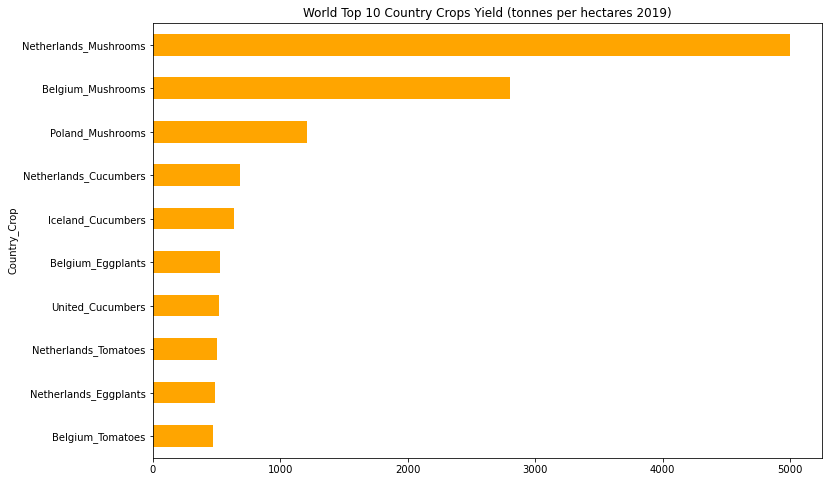

In [39]:
# Select top 10.
result4a_df = crop_2019_world_yield_df.iloc[0:10 , :]
result4a_df['Country_Crop'] = result4a_df['Country'].str.split().str.get(0) + '_' + result4a_df['Crop'].str.split().str.get(0)
print(result4a_df.head(10))

#Plot the result
# Yield are recorded in hg/ha.
# Change area harvested unit to tonnes per hectare.
result4a_df['2019'] = result4a_df['2019'].apply(lambda x: x / 10000)
result4a_df = result4a_df.set_index('Country_Crop')
result4a_df = result4a_df.sort_values(by = ['2019'], ascending = [True] ,)
axes = result4a_df['2019'].plot(
    kind='barh',
    x = 'Crop',
    y = '2019',
    figsize=[12, 8],
    title='World Top 10 Country Crops Yield (tonnes per hectares 2019)',
    color='orange'
)

**Answer 4a**

The top yielding crops in the world had 3 top positions occupied by mushrooms and truffles in three separate countries (Netherland, Belgium and Poland).  Seems like all top 10 countries are in Europe.

In [40]:
# Where is Australia.
print(crop_2019_world_yield_df[(crop_2019_world_yield_df["Country"] == 'Australia')])

        Country                           Crop       2019
15    Australia         Mushrooms and truffles  3605926.0
116   Australia                       Tomatoes   769490.0
126   Australia                     Sugar cane   748356.0
203   Australia            Carrots and turnips   620795.0
266   Australia                    Onions, dry   545359.0
...         ...                            ...        ...
6935  Australia                         Barley    19878.0
7052  Australia                       Apricots    18616.0
7150  Australia                 Cereals, Total    17687.0
7236  Australia                          Wheat    16917.0
7258  Australia  Broad beans, horse beans, dry    16684.0

[63 rows x 3 columns]



Australia top yield crop was mushrooms and truffles at 3.7 million sitting at no.16 and Wheat is at no. 7235 in the world.

In [41]:
# Selecting Type production for year 2019 only for all countries.
crop_world_production_df = crop_df[(crop_df["Type"] == 'Production')]
crop_2019_world_production_df = crop_world_production_df.loc[:, ['Country','Crop', '2019']]
crop_2019_world_production_df = crop_2019_world_production_df.sort_values(
    by = '2019',
    ascending = False,
).reset_index()
crop_2019_world_production_df = crop_2019_world_production_df.drop(['index'], axis=1)
crop_2019_world_production_df.head(10)

,Country,Crop,2019
0,Brazil,Sugar cane,752895389.0
1,China,"Cereals, Total",614697756.0
2,China,Vegetables Primary,590676143.0
3,United States of America,"Cereals, Total",421549385.0
4,India,Sugar cane,405416180.0
5,United States of America,Maize,347047570.0
6,India,"Cereals, Total",324300640.0
7,China,Maize,260957662.0
8,Indonesia,Oil palm fruit,245633087.0
9,China,"Rice, paddy",211405211.0


                    Country                Crop         2019      Country_Crop
0                    Brazil          Sugar cane  752895389.0      Brazil_Sugar
1                     China      Cereals, Total  614697756.0    China_Cereals,
2                     China  Vegetables Primary  590676143.0  China_Vegetables
3  United States of America      Cereals, Total  421549385.0   United_Cereals,
4                     India          Sugar cane  405416180.0       India_Sugar
5  United States of America               Maize  347047570.0      United_Maize
6                     India      Cereals, Total  324300640.0    India_Cereals,
7                     China               Maize  260957662.0       China_Maize
8                 Indonesia      Oil palm fruit  245633087.0     Indonesia_Oil
9                     China         Rice, paddy  211405211.0       China_Rice,


C:\Users\GPEL_HPENVY\anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\GPEL_HPENVY\anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


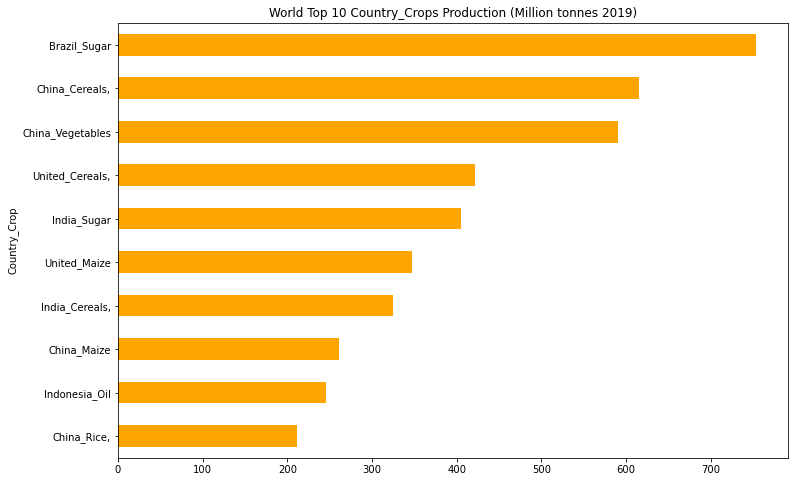

In [42]:
# Select top 10.
result4b_df = crop_2019_world_production_df.iloc[0:10 , :]
result4b_df['Country_Crop'] = result4b_df['Country'].str.split().str.get(0) + '_' + result4b_df['Crop'].str.split().str.get(0)
print(result4b_df.head(10))

#Plot the result
# Yield are recorded in hg/ha.
# Change area harvested unit to tonnes per hectare.
result4b_df['2019'] = result4b_df['2019'].apply(lambda x: x / 1000000)
result4b_df = result4b_df.set_index('Country_Crop')
result4b_df = result4b_df.sort_values(by = ['2019'], ascending = [True] ,)
axes = result4b_df['2019'].plot(
    kind='barh',
    x = 'Crop',
    y = '2019',
    figsize=[12, 8],
    title='World Top 10 Country_Crops Production (Million tonnes 2019)',
    color='orange'
)

**Answer 4b**

The top crops production by weight is sugar cane (Brazil) and sugar cane is also no.5 (India).  China occupy 4 of the top 10 spot while India and USA had 2 spots each.  Indonesia took 9 positon.  Cereal occupy no 2, 4 and 7 position.  Where is Australia?

In [43]:
# Where is Australia.
print(crop_2019_world_production_df[(crop_2019_world_production_df["Country"] == 'Australia')])

        Country             Crop        2019
72    Australia       Sugar cane  32415352.0
83    Australia   Cereals, Total  29238704.0
141   Australia            Wheat  17597561.0
257   Australia           Barley   8818946.0
691   Australia         Rapeseed   2365839.0
...         ...              ...         ...
4771  Australia              Rye     32248.0
5258  Australia      Peas, green     22431.0
5566  Australia  Plums and sloes     16941.0
5643  Australia         Cherries     15941.0
5708  Australia         Soybeans     15136.0

[61 rows x 3 columns]


Australia top crops production is no. 73 in the world and wheat sit at no.142.

In [44]:
# Selecting Type area harvest for year 2019 only for all countries.
crop_world_area_df = crop_df[(crop_df["Type"] == 'Area harvested')]
crop_2019_world_area_df = crop_world_area_df.loc[:, ['Country','Crop', '2019']]
crop_2019_world_area_df = crop_2019_world_area_df.set_index('Country')
crop_2019_world_area_df = crop_2019_world_area_df.sort_values(
    by = '2019',
    ascending = False,
).reset_index()
crop_2019_world_area_df.head(10)

,Country,Crop,2019
0,China,"Cereals, Total",97908088.0
1,India,"Cereals, Total",95244530.0
2,United States of America,"Cereals, Total",52492802.0
3,India,"Rice, paddy",43780000.0
4,Russian Federation,"Cereals, Total",43412434.0
5,India,"Oilcrops, Oil Equivalent",42960603.0
6,India,"Oilcrops, Cake Equivalent",42209283.0
7,China,Maize,41309740.0
8,Brazil,"Oilcrops, Oil Equivalent",38376162.0
9,Brazil,"Oilcrops, Cake Equivalent",38324110.0


C:\Users\GPEL_HPENVY\anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


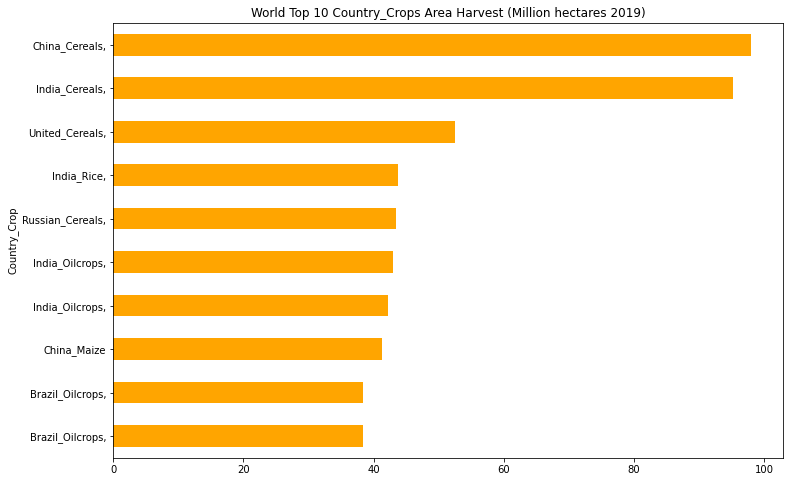

In [45]:
# Select top 10.
result4c_df = crop_2019_world_area_df.iloc[0:10 , :]
result4c_df['Country_Crop'] = result4c_df['Country'].str.split().str.get(0) + '_' + result4c_df['Crop'].str.split().str.get(0)

#Plot the result
# Yield are recorded in hg/ha.
# Change area harvested unit to tonnes per hectare.
result4c_df['2019'] = result4c_df['2019'].apply(lambda x: x / 1000000)
result4c_df = result4c_df.set_index('Country_Crop')
result4c_df = result4c_df.sort_values(by = ['2019'], ascending = [True] ,)
axes = result4c_df['2019'].plot(
    kind='barh',
    x = 'Crop',
    y = '2019',
    figsize=[12, 8],
    title='World Top 10 Country_Crops Area Harvest (Million hectares 2019)',
    color='orange'
)

**Answer 4c**

The largest area for crops harvest is in China for cereal with almost 100 million hectares. India, USA, Russia and Brazil occupy the other top spots. Where is Australia?

In [46]:
# Where is Australia.
print(crop_2019_world_area_df[(crop_2019_world_area_df["Country"] == 'Australia')])

        Country                       Crop        2019
32    Australia             Cereals, Total  16530732.0
60    Australia                      Wheat  10402271.0
132   Australia                     Barley   4436588.0
210   Australia   Oilcrops, Oil Equivalent   2501384.0
212   Australia  Oilcrops, Cake Equivalent   2465420.0
...         ...                        ...         ...
8239  Australia                    Papayas       288.0
8280  Australia                       Hops       277.0
8376  Australia                Raspberries       245.0
8601  Australia                 Kiwi fruit       177.0
8789  Australia     Mushrooms and truffles       135.0

[84 rows x 3 columns]


In terms of area harvested, Australia cereals area harvest sit at no.33 while wheat is at no. 61.

### **4.5 Answer Question 5: In 2019, if we consider just wheat, how does Australia yield, production and harvest area compared to the rest of the world?**

In [47]:
# Selecting yield and wheat for year 2019 only for all countries.
crop_2019_world_wheat_yield_df = crop_2019_world_yield_df[(crop_2019_world_yield_df["Crop"] == 'Wheat')].reset_index()
crop_2019_world_wheat_yield_df = crop_2019_world_wheat_yield_df.loc[:, ['Country','Crop', '2019']]
crop_2019_world_wheat_yield_df = crop_2019_world_wheat_yield_df.sort_values(
    by = '2019',
    ascending = False,
)
crop_2019_world_wheat_yield_df.head(10)

,Country,Crop,2019
0,Ireland,Wheat,93787.0
1,Netherlands,Wheat,93781.0
2,Belgium,Wheat,93364.0
3,United Kingdom of Great Britain and Northern I...,Wheat,89345.0
4,New Zealand,Wheat,88465.0
5,Denmark,Wheat,80957.0
6,France,Wheat,77428.0
7,Sweden,Wheat,74055.0
8,Germany,Wheat,73964.0
9,Zambia,Wheat,66877.0


In [48]:
# Where is Australia.
print(crop_2019_world_wheat_yield_df[(crop_2019_world_wheat_yield_df["Country"] == 'Australia')])

      Country   Crop     2019
92  Australia  Wheat  16917.0


In [49]:
crop_2019_world_wheat_yield_df.shape

(100, 3)

**Answer 5a**

Australia wheat yield is at no. 93 position out of 100 wheat producers, almost at the bottom.  The top 3 countires practically tied at over 93000 hg/ha which is more than 5.5 times (93364/16917 = ~5.5) more than Australia wheat yield.  This basically confirmed my wife's farmer friend assertion more than 10 years ago.

In [50]:
# Selecting yield and wheat for year 2019 only for all countries.
crop_2019_world_wheat_production_df = crop_2019_world_production_df[(crop_2019_world_production_df["Crop"] == 'Wheat')].reset_index()
crop_2019_world_wheat_production_df = crop_2019_world_wheat_production_df.loc[:, ['Country','Crop', '2019']]
crop_2019_world_wheat_production_df = crop_2019_world_wheat_production_df.sort_values(
    by = '2019',
    ascending = False,
)
crop_2019_world_wheat_production_df.head(10)

,Country,Crop,2019
0,China,Wheat,133601131.0
1,India,Wheat,103596230.0
2,Russian Federation,Wheat,74452692.0
3,United States of America,Wheat,52257620.0
4,France,Wheat,40604960.0
5,Canada,Wheat,32347900.0
6,Ukraine,Wheat,28370280.0
7,Pakistan,Wheat,24348983.0
8,Germany,Wheat,23062600.0
9,Argentina,Wheat,19459727.0


In [51]:
# Where is Australia.
print(crop_2019_world_wheat_production_df[(crop_2019_world_wheat_production_df["Country"] == 'Australia')])

      Country   Crop        2019
11  Australia  Wheat  17597561.0


**Answer 5b**

In terms of wheat production, Australia is at no.12.  Eventhough Australia wheat yield is low, it is almost top 10 in production which mean the area harvested must be quite large.  The China at no.1 and India at no.2 being the top2 producers in the world produced over 100 million tonnes which is almost 6 times more than Australia wheat production.

In [52]:
# Selecting yield and wheat for year 2019 only for all countries.
crop_2019_world_wheat_area_df = crop_2019_world_area_df[(crop_2019_world_area_df["Crop"] == 'Wheat')].reset_index()
crop_2019_world_wheat_area_df = crop_2019_world_wheat_area_df.loc[:, ['Country','Crop', '2019']]
crop_2019_world_wheat_area_df = crop_2019_world_wheat_area_df.sort_values(
    by = '2019',
    ascending = False,
)
crop_2019_world_wheat_area_df.head(10)

,Country,Crop,2019
0,India,Wheat,29318790.0
1,Russian Federation,Wheat,27558617.0
2,China,Wheat,23732560.0
3,United States of America,Wheat,15039090.0
4,Kazakhstan,Wheat,11413941.0
5,Australia,Wheat,10402271.0
6,Canada,Wheat,9655600.0
7,Pakistan,Wheat,8677730.0
8,Iran (Islamic Republic of),Wheat,8035937.0
9,Turkey,Wheat,6831854.0


**Answer 5c**

In term of area harvested for wheat, Australia is at no.6 which contributed to higher production. The top 3 countries is more than double the size of Australia area harvested for wheat.

### **4.6 Answer Question 6: In 2019, which countries produced the most total crops production per 10,000 people?**

In [53]:
# Groupby total production for all crops per country for 2019.
total_crops = crop_2019_world_production_df.groupby(['Country']).sum('2019').reset_index()

# rename the columns
total_crops.columns = ['Country', '2019 Total Production']

In [54]:
# Select only the Country and 2019 columns in world population dataset
population_2019_df = population_df.loc[:, ['Country', '2019']]

# rename the columns
population_2019_df.columns = ['Country', '2019 Total Population']

In [55]:
# Merge the two dataframes using Country as key.
crops_population_df = total_crops.merge(population_2019_df, how='left', on='Country')
crops_population_df

,Country,2019 Total Production,2019 Total Population
0,Afghanistan,19387232.0,38041.754
1,Albania,4687331.0,2880.917
2,Algeria,46061815.0,43053.054
3,Angola,37675489.0,31825.295
4,Argentina,333426042.0,44780.677
...,...,...,...
177,Venezuela (Bolivarian Republic of),19447424.0,28515.829
178,Viet Nam,189499103.0,96462.106
179,Yemen,3949719.0,29161.922
180,Zambia,20009856.0,17861.030


In [56]:
# Calculate the total production per 10000 people per country
crops_population_df['Production_per_10000'] = crops_population_df['2019 Total Production'] / (crops_population_df['2019 Total Population'] * 10)

# Sort the data in descendign order
crops_population_df = crops_population_df.sort_values(
    by = 'Production_per_10000',
    ascending = False,
).reset_index()
crops_population_df

,index,Country,2019 Total Production,2019 Total Population,Production_per_10000
0,4,Argentina,333426042.0,44780.677,744.575706
1,125,Paraguay,47886712.0,7044.636,679.761339
2,169,Ukraine,266140054.0,43993.638,604.951230
3,15,Belize,2202739.0,390.353,564.294113
4,28,Canada,203755734.0,37411.047,544.640555
...,...,...,...,...,...
177,164,Trinidad and Tobago,90301.0,1394.973,6.473315
178,131,Qatar,116460.0,2832.067,4.112191
179,10,Bahrain,18332.0,1641.172,1.117007
180,145,Singapore,50591.0,5804.337,0.871607


In [57]:
# Where is Australia.
print(crops_population_df[(crops_population_df["Country"] == 'Australia')])

   index    Country  2019 Total Production  2019 Total Population  \
9      6  Australia            112331726.0              25203.198   

   Production_per_10000  
9            445.704255  


<AxesSubplot:title={'center':'2019: World Top 20 Country Total Production (Tonnes per 10000 people)'}, ylabel='Country'>

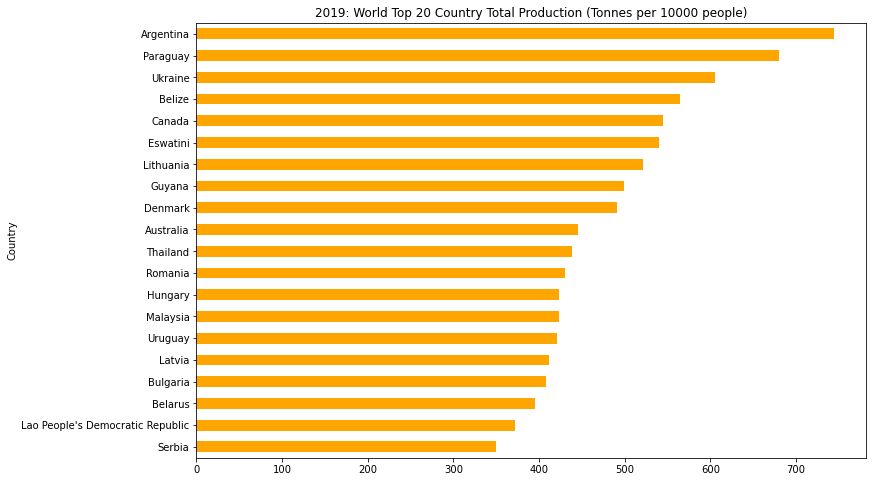

In [58]:
# Select top 20.
result5_df = crops_population_df.iloc[0:20 , :]

#Plot the result
# Unit is Total production in tonnes per 10000 people
result5_df = result5_df.set_index('Country')
result5_df = result5_df.sort_values(by = ['Production_per_10000'], ascending = [True] ,)
result5_df['Production_per_10000'].plot(
    kind='barh',
    x = 'Country',
    y = 'Production_per_10000',
    figsize=[12, 8],
    title='2019: World Top 20 Country Total Production (Tonnes per 10000 people)',
    color='orange'
)

**Answer 6**

So, if we normalize the total production with the population, Argentina is no.1 while Australia at no.10.  The previous top 10 producers are not even in this top 20 listed here.  Granted that we have filter some of the production data (anything less than 15000 tonnes were removed) to reduce the file size, this result is still very compelling. I think this is a fairer representation of the how productive the country are.

### **4.7 Answer Question 7: In 2019, who are the top crops producers in the world by total weight and what is the percentage?**

In [59]:
# rerunning the selection of production from crop data for 2019
crop_world_production_df = crop_df[(crop_df["Type"] == 'Production')]
crop_2019_world_production_df = crop_world_production_df.loc[:, ['Country','Crop', '2019']]
crop_2019_world_production_df = crop_2019_world_production_df.drop(['Crop'],axis=1 )

# Adding all total weight of crop by country
crop_2019_world_production_df = crop_2019_world_production_df.groupby(['Country']).sum()

In [60]:
# Sorting by descending order.
result1b_df = crop_2019_world_production_df.sort_values(by = ['2019'], ascending = False)
result1b_df.head(10)

,2019
Country,
China,3.285923e+09
India,1.712135e+09
Brazil,1.371371e+09
United States of America,1.261861e+09
Indonesia,6.209843e+08
Russian Federation,4.188244e+08
Nigeria,3.759379e+08
Argentina,3.334260e+08
Thailand,3.051418e+08


In [61]:
# Compute total production for 2019.
total = result1b_df['2019'].sum()
total

15227435874.0

In [62]:
# Compute just the top10
top10 =  result1b_df.iloc[0:10, 0:1].sum()
top10

2019    9.951745e+09
dtype: float64

In [63]:
# Compute the rest of the contries contribution
others = total - top10
others

2019    5.275691e+09
dtype: float64

In [64]:
# Select the top10
result1b_df = result1b_df.iloc[0:10,:]
result1b_df

,2019
Country,
China,3.285923e+09
India,1.712135e+09
Brazil,1.371371e+09
United States of America,1.261861e+09
Indonesia,6.209843e+08
Russian Federation,4.188244e+08
Nigeria,3.759379e+08
Argentina,3.334260e+08
Thailand,3.051418e+08


In [65]:
# Add Others (countries) contribution.
result1b_df.at['Others','2019'] = 5.275691e+09
result1b_df

,2019
Country,
China,3.285923e+09
India,1.712135e+09
Brazil,1.371371e+09
United States of America,1.261861e+09
Indonesia,6.209843e+08
Russian Federation,4.188244e+08
Nigeria,3.759379e+08
Argentina,3.334260e+08
Thailand,3.051418e+08


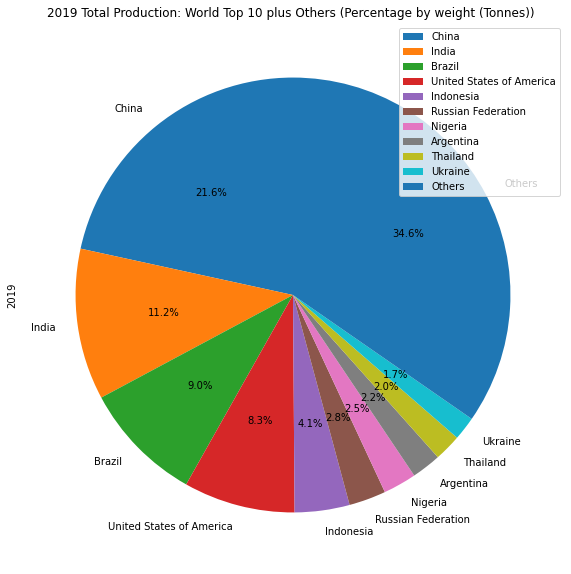

In [66]:
#Plot the pie chart for Total Production by country pecentage by weight (Tonnes)
axes = result1b_df.plot(
    kind = 'pie',
    y ='2019',
    title='2019 Total Production: World Top 10 plus Others (Percentage by weight (Tonnes)) ',
    figsize = (10, 10),
    autopct = '%1.1f%%',
    startangle = 90,
)

**Answer 7**

The top 10 crops producers contribute to about 75% of the total production by weight in 2019.  The world powerhouse of crop production are China, India, Brazil and USA with combine contributon of about 50% of the total weight.

### **4.8 Answer Question 8: How has the Australia rain fall averages changes over time from 1961-2019 compared to the rest of the world?  Is there relationship between crop production and rain fall in Australia?**

1962    38.216667
1963    40.600000
1964    37.891667
1965    30.058333
1966    34.658333
1967    35.758333
1968    44.850000
1969    36.175000
1970    33.583333
1971    41.800000
Name:  Australia, dtype: float64


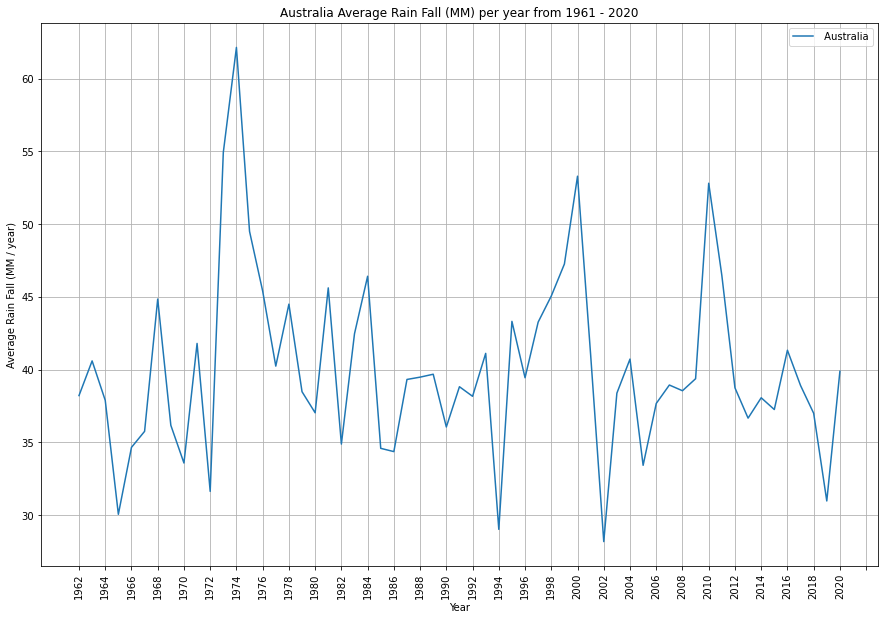

In [67]:
# Select Australia rain fall from 1961-2020.
australia_rain_df = rain_df.set_index('Country')
australia_rain_df.drop('Country Code', axis=1, inplace=True)
australia_rain_df = australia_rain_df.loc[(' Australia')]
#australia_rain_df = australia_rain_df.reset_index(level=0, drop=True)

# Selecting all rows from 2nd row onwards
australia_rain_df = australia_rain_df.iloc[1: ]
print(australia_rain_df.head(10))

#australia_rain_df.plot()
# Create a line plot
ax = australia_rain_df.plot(
    kind='line',
    title='Australia Average Rain Fall (MM) per year from 1961 - 2020',
    ylabel='Average Rain Fall (MM / year)',
    xlabel='Year',
    xticks = [x for x in range(0, 62, 2)],
    grid = True,
    rot = 90,
    legend = True,
    figsize=(15,10)
)

**Answer 8a**

Australia average rain fall had been very fluctuating.  Significant drop in year 1982, 1990-91, 1994, 2002, 2005-7, 2016 and 2019 which had been noted in Q2 as major drop in crop production as well.  This basically showed close link to rainfall and crop production.

In [68]:
rain_world_2020_df = rain_df[['Country', 'Country Code', '2020']]
rain_world_2020_df['Country Code'] = rain_world_2020_df['Country Code'].apply(lambda x: x.strip())
rain_world_2020_df

C:\Users\GPEL_HPENVY\anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Country,Country Code,2020
0,Afghanistan,AFG,31.358333
1,Albania,ALB,84.266667
2,Algeria,DZA,4.866667
3,Andorra,AND,79.308333
4,Angola,AGO,84.716667
...,...,...,...
193,Yemen,YEM,14.600000
194,Zambia,ZMB,84.800000
195,Zimbabwe,ZWE,54.533333
196,North Korea,PRK,109.758333


In [69]:
# Load the world map data file
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#world = world[(world.name!="Antarctica")]
#world.rename({'iso_a3': 'Country Code'}, axis=1, inplace=True)
#world
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [70]:
# Some values in column iso_a3 is not correct.
print(world[(world["iso_a3"] == '-99')])

# Correcting the iso_a3 value for some countries. 
world.at[21,'iso_a3']='NOR'
world.at[43,'iso_a3']='FRA'
world.at[160,'iso_a3']='CYP'
world.at[167,'iso_a3']='SOM'

      pop_est continent        name iso_a3  gdp_md_est  \
21    5320045    Europe      Norway    -99    364700.0   
43   67106161    Europe      France    -99   2699000.0   
160    265100      Asia   N. Cyprus    -99      3600.0   
167   3500000    Africa  Somaliland    -99     12250.0   
174   1895250    Europe      Kosovo    -99     18490.0   

                                              geometry  
21   MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...  
43   MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...  
160  POLYGON ((32.73178 35.14003, 32.80247 35.14550...  
167  POLYGON ((48.94820 11.41062, 48.94820 11.41062...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  


In [71]:
# Merging two dataframe using Country Code as key.
world_merge = world.merge(rain_world_2020_df, left_on='iso_a3', 
                          right_on='Country Code', how='left',)
world_merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Country Code,2020
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,253.450000
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,107.816667
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,36.916667
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,USA,55.958333
...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Republic of Serbia,SRB,59.566667
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Republic of Montenegro,MNE,93.591667
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,TTO,142.883333


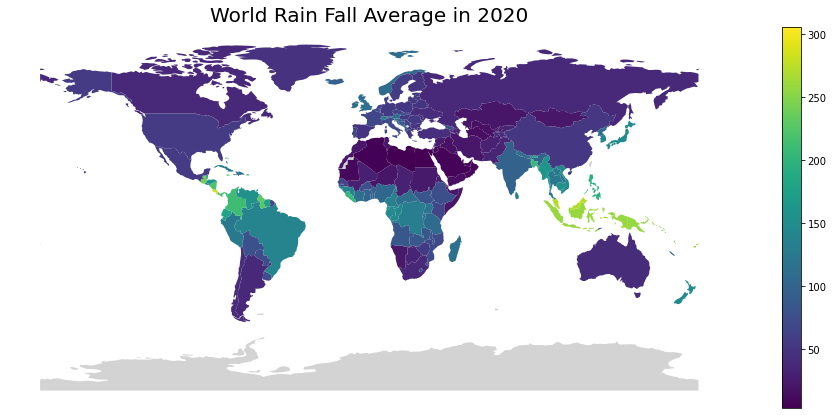

In [72]:
# Create the heatmap
fig, ax_world = plt.subplots(1, figsize=(18, 7))
ax_world.set_title(
    'World Rain Fall Average in 2020', 
    fontdict={'fontsize': '20', 'fontweight': '50'}
)
ax_world.axis('off')
axes = world_merge.plot(
    column='2020', 
    legend=True,
    ax=ax_world,
    cmap='viridis',
    missing_kwds={"color": "lightgrey"}
)

**Answer 8b**

The world average rain fall map in 2020 showed that countries near the equator are getting a lot of rain compared to the rest of the world.  Australia is basically colored below the 50MM per year.  Southeast Asia, Brazil, middle part of Africa, India, USA and China are getting 80MM or more per year of rain.

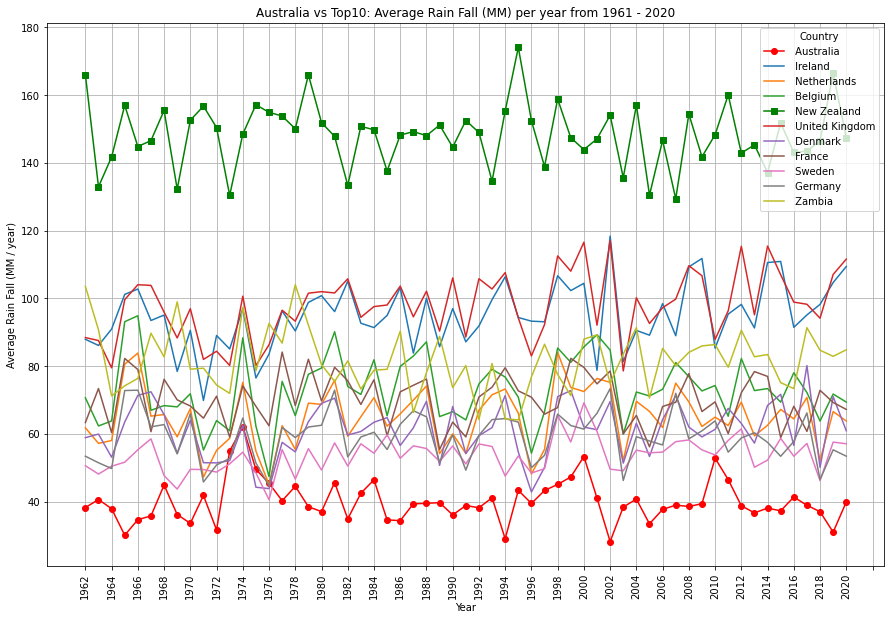

In [73]:
# Select rain fall from 1961-2020.
top10_rain_df = rain_df.set_index('Country')
top10_rain_df.drop('Country Code', axis=1, inplace=True)

# Select top10 producers based on Q5.  Wheat production only.
columns = [' Australia', ' Ireland', ' Netherlands', ' Belgium', ' New Zealand',
           ' United Kingdom', ' Denmark', ' France', ' Sweden', ' Germany', ' Zambia']
top10_rain_df = top10_rain_df.loc[columns]
#australia_rain_df = australia_rain_df.reset_index(level=0, drop=True)

top10_rain_df = top10_rain_df.T
# Selecting all rows from 2nd row onwards
top10_rain_df = top10_rain_df.iloc[1: ]

# Create a line plot
axes = top10_rain_df.plot(
    kind='line',
    title='Australia vs Top10: Average Rain Fall (MM) per year from 1961 - 2020',
    ylabel='Average Rain Fall (MM / year)',
    xlabel='Year',
    xticks = [x for x in range(0, 62, 2)],
    grid = True,
    rot = 90,
    style = ['ro-','-','-','-','gs-'],
    legend = True,
    figsize=(15,10)
)


**Answer 8c**

Australia average rainfall at about 40MM per year sit at the bottom of this line graph.  Majority of the top 10 producers are getting between 60-100MM per year with New Zealand at 150 MM per year. 

In [74]:
# changing from series to dataframe
australia_ave_rain_df = australia_rain_df.to_frame()
australia_ave_rain_df = australia_ave_rain_df.reset_index()

# rename the columns
australia_ave_rain_df.columns = ['Year', 'Average_Rainfall_MM']
australia_ave_rain_df.head(10)

,Year,Average_Rainfall_MM
0,1962,38.216667
1,1963,40.600000
2,1964,37.891667
3,1965,30.058333
4,1966,34.658333
5,1967,35.758333
6,1968,44.850000
7,1969,36.175000
8,1970,33.583333
9,1971,41.800000


In [75]:
# Select Australia wheat production from 1961-2019
australia_crop_wheat_production_df = australia_crop_production_df[(australia_crop_production_df["Crop"] == 'Wheat')].reset_index()

# Remove columns that are not required
australia_crop_wheat_production_df = australia_crop_wheat_production_df.drop(
    ['index', 'Unnamed: 0', 'Crop',
    ],
    axis=1 
)

# Transposing and reset index.
australia_crop_wheat_production_df = australia_crop_wheat_production_df.T
australia_crop_wheat_production_df = australia_crop_wheat_production_df.reset_index()

#rename the columns
australia_crop_wheat_production_df.columns = ['Year', 'Wheat_Production_Tonnes']
australia_crop_wheat_production_df.head(10)

,Year,Wheat_Production_Tonnes
0,1961,6727192.0
1,1962,8352912.0
2,1963,8924460.0
3,1964,10036954.0
4,1965,7067060.0
5,1966,12699257.0
6,1967,7546691.0
7,1968,14804143.0
8,1969,10546200.0
9,1970,7889918.0


In [76]:
# Merge the two dataframes using Year as key.
australia_wheat_rainfall_df = australia_ave_rain_df.merge(australia_crop_wheat_production_df, how='right', on='Year')
australia_wheat_rainfall_df.head(10)

,Year,Average_Rainfall_MM,Wheat_Production_Tonnes
0,1961,NaN,6727192.0
1,1962,38.216667,8352912.0
2,1963,40.600000,8924460.0
3,1964,37.891667,10036954.0
4,1965,30.058333,7067060.0
5,1966,34.658333,12699257.0
6,1967,35.758333,7546691.0
7,1968,44.850000,14804143.0
8,1969,36.175000,10546200.0
9,1970,33.583333,7889918.0


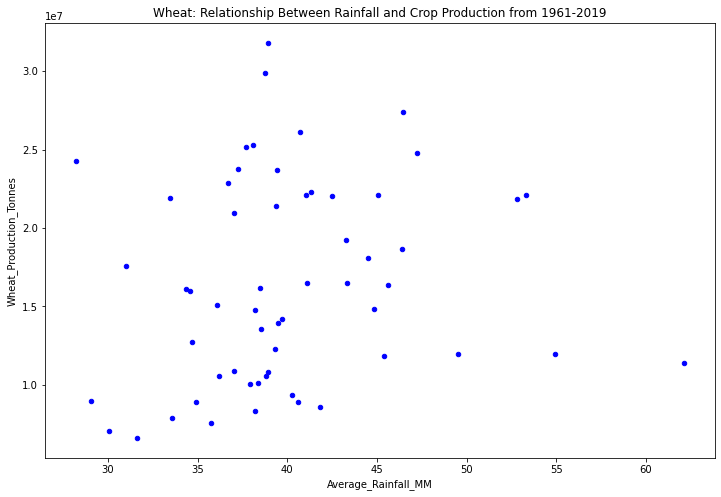

In [77]:
#Plot the result
ax = australia_wheat_rainfall_df.plot(
    kind='scatter',
    x = 'Average_Rainfall_MM',
    y = 'Wheat_Production_Tonnes',
    figsize=[12, 8],
    color='blue',
    title='Wheat: Relationship Between Rainfall and Crop Production from 1961-2019'
)

In [78]:
# Get the correlation between the production and area harvested.
my_correlation = australia_wheat_rainfall_df['Average_Rainfall_MM'].corr(australia_wheat_rainfall_df['Wheat_Production_Tonnes'])
my_correlation

0.14729587338938177

**Answer 8d**

There is weak relationship between average rainfall with wheat production (Correlation = 0.14).  This is probably too general since Australia is a vast country.  Averaging over such a large area might loose its meaning. We probably need to look at more specific area of Australia by region or states to see this relationship better.  The current rainfall dataset doesn't have the average area per region of Australia so this kind of analysis is not possible.

### **4.9 Answer Question 9: How has the Australia ferlizers usage changes over time from 1961-2019?  Is there relationship between crop production and ferlizers usage?**

In [79]:
# Select Australia data for fertilizers and transposing.
australia_fertilizers_df = fertilizers_df[(fertilizers_df["Country"] == 'Australia')].reset_index()
australia_fertilizers_df = australia_fertilizers_df.T

#rename the columns
australia_fertilizers_df.columns = ['Nitrogen (N)', 'Phosphate (P)', 'Potash (K)']

# Selecting all rows from 4th row onwards
australia_fertilizers_df = australia_fertilizers_df.iloc[3: ]

australia_fertilizers_df.head(10)

,Nitrogen (N),Phosphate (P),Potash (K)
1961,35017.0,587847.0,47886.0
1962,43800.0,570322.0,37816.0
1963,70200.0,618355.0,60237.0
1964,64000.0,846445.0,60756.0
1965,70000.0,953550.0,62685.0
1966,85412.0,975163.0,67913.0
1967,129997.0,887413.0,73690.0
1968,140386.0,924660.0,76348.0
1969,125413.0,847307.0,75413.0
1970,123381.0,756843.0,91006.0


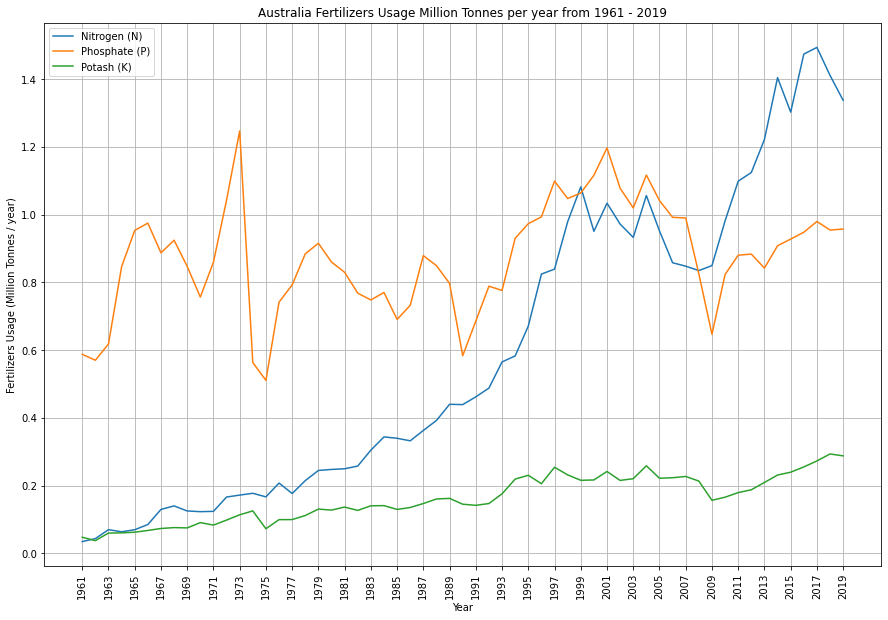

In [80]:
# Change the unit to Million tonnes.
columns = ['Nitrogen (N)', 'Phosphate (P)', 'Potash (K)']
australia_fertilizers_df[columns] = australia_fertilizers_df[columns].apply(lambda x: x / 1000000)

# Create a line plot
axes = australia_fertilizers_df.plot(
    kind='line',
    title='Australia Fertilizers Usage Million Tonnes per year from 1961 - 2019',
    ylabel='Fertilizers Usage (Million Tonnes / year)',
    xlabel='Year',
    xticks = [x for x in range(0, 60, 2)],
    grid = True,
    rot = 90,
    legend = True,
    figsize=(15,10)
)

**Answer 9a**

Interesting to note that Nitrogen (N) usage for agricultural usage in Australia have increase significantly over the years while Potash (K) is used the least and showed slow but steady increase.  Phosphate (P) showed wild fluctuation with high usage.  Which crops uses lots of these fertilizers in Australia?  We do not have the granularity in the dataset to investigate this however.

In [81]:
fertilizers_df.head(10)

,Country,Fertilizer,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,Nitrogen (N),1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,9000.0,14000.0,...,12929.01,22970.63,17065.25,34903.79,73872.84,21075.57,96670.85,140775.85,46613.50,59702.92
1,Afghanistan,Phosphate (P),100.0,100.0,100.0,100.0,100.0,500.0,1000.0,1000.0,...,925.85,6845.57,1261.44,3020.03,5121.35,10146.92,8991.27,16656.69,12319.04,25761.88
2,Afghanistan,Potash (K),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,196.78,88.11,6.67,9.90,71.73,31.48,0.62,0.00
3,Albania,Nitrogen (N),3187.0,2000.0,2000.0,2000.0,2000.0,3000.0,7000.0,19000.0,...,31292.44,36892.70,34944.13,30711.91,30711.76,36803.92,42896.08,39184.92,24769.07,38329.56
4,Albania,Phosphate (P),2433.0,2500.0,2500.0,3500.0,5000.0,5000.0,7000.0,16000.0,...,21633.44,23341.22,22165.38,22906.47,22906.54,28725.33,34544.12,21263.69,13358.07,15087.82
5,Albania,Potash (K),682.0,700.0,800.0,900.0,1000.0,1500.0,1500.0,2000.0,...,299.10,370.20,504.90,792.00,792.00,797.75,803.50,634.25,2579.38,4190.61
6,Algeria,Nitrogen (N),9000.0,15000.0,18000.0,16000.0,13347.0,17150.0,14530.0,20000.0,...,60100.00,56300.00,72600.00,64000.00,76500.00,74400.00,70200.00,70200.00,70200.00,70200.00
7,Algeria,Phosphate (P),25000.0,25000.0,20000.0,20000.0,14536.0,20800.0,25000.0,29000.0,...,32800.00,36500.00,57500.00,71300.00,78000.00,63200.00,58800.00,58800.00,58800.00,58800.00
8,Algeria,Potash (K),15000.0,15000.0,15000.0,16500.0,11171.0,13350.0,12000.0,19000.0,...,25600.00,25500.00,30000.00,33000.00,36000.00,38000.00,26700.00,26700.00,26700.00,26700.00
9,Angola,Nitrogen (N),500.0,500.0,500.0,1000.0,2800.0,3600.0,5000.0,5000.0,...,17369.00,16381.00,19423.09,20439.57,27612.52,25494.28,20776.77,26714.79,21942.48,17106.87


In [82]:
# Groupby all fertilizers (N-P-K) per country from 1961-2019
total_fertilizers_df = fertilizers_df.groupby(['Country']).sum()

# Tranposing
total_fertilizers_df = total_fertilizers_df.T

total_fertilizers_df.reset_index()
total_fertilizers_df.head(10)

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Yugoslav SFR,Zambia,Zimbabwe
1961,1100.0,6302.0,49000.0,1000.0,0.0,16241.0,0.0,670750.0,251507.0,0.0,...,2723.0,7466210.65,22700.0,0.0,19000.0,89000.0,0.0,262466.0,10200.0,41390.0
1962,1100.0,5200.0,55000.0,1000.0,0.0,12711.0,0.0,651938.0,290185.0,0.0,...,2380.0,8274858.92,26200.0,0.0,16000.0,95000.0,0.0,325191.0,8510.0,39110.0
1963,1100.0,5300.0,53000.0,1400.0,0.0,21080.0,0.0,748792.0,326004.0,0.0,...,3100.0,9169916.54,31300.0,0.0,26000.0,105000.0,0.0,443775.0,9150.0,48100.0
1964,1100.0,6400.0,52500.0,2100.0,0.0,29500.0,0.0,971201.0,346472.0,0.0,...,3900.0,9793376.58,40785.0,0.0,33000.0,92000.0,0.0,460768.0,10550.0,69000.0
1965,1100.0,8000.0,39054.0,4000.0,0.0,40500.0,0.0,1086235.0,363280.0,0.0,...,7000.0,10803761.23,34432.0,0.0,35000.0,78000.0,0.0,455132.0,11000.0,75000.0
1966,1500.0,9500.0,51300.0,5200.0,0.0,52568.0,0.0,1128488.0,216903.0,0.0,...,8800.0,12166430.19,46375.0,0.0,33882.0,46000.0,15.0,501661.0,12200.0,75200.0
1967,10000.0,15500.0,51530.0,6700.0,0.0,68460.0,0.0,1091100.0,416556.0,0.0,...,8700.0,13301982.21,41106.0,0.0,43203.0,116446.0,20.0,516424.0,14800.0,84200.0
1968,15000.0,37000.0,68000.0,7600.0,0.0,67666.0,0.0,1141394.0,363493.0,0.0,...,9000.0,13911076.85,68130.0,0.0,53435.0,113494.0,35.0,551250.0,19100.0,83000.0
1969,17000.0,36000.0,70000.0,10500.0,0.0,79554.0,0.0,1048133.0,421444.0,0.0,...,11000.0,14408054.08,59808.0,0.0,47032.0,275558.0,539.0,583498.0,16409.0,94200.0
1970,19400.0,44100.0,111000.0,11300.0,0.0,87036.0,0.0,971230.0,407818.0,0.0,...,15000.0,15218708.15,69278.0,0.0,59470.0,311269.0,100.0,631460.0,36199.0,106300.0


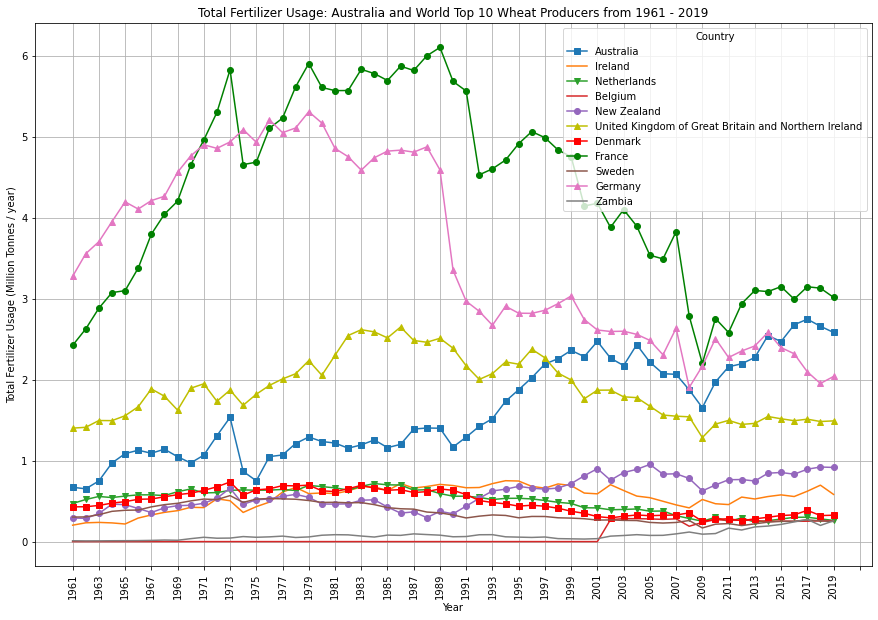

In [83]:
# Select top10 producers based on Q5.  Wheat production only.
columns = ['Australia', 'Ireland', 'Netherlands', 'Belgium', 'New Zealand',
           'United Kingdom of Great Britain and Northern Ireland', 'Denmark', 'France', 'Sweden', 'Germany', 'Zambia']
total_fertilizers_df = total_fertilizers_df[columns]

# Change unit to Millions tonnes.
total_fertilizers_df = total_fertilizers_df.apply(lambda x: x / 1000000)

# Create a line plot
axes = total_fertilizers_df.plot(
    kind='line',
    title='Total Fertilizer Usage: Australia and World Top 10 Wheat Producers from 1961 - 2019',
    ylabel='Total Fertilizer Usage (Million Tonnes / year)',
    xlabel='Year',
    xticks = [x for x in range(0, 62, 2)],
    grid = True,
    rot = 90,
    style = ['s-','-','v-','-','o-','y^-','rs-','go-','-','^-'],
    legend = True,
    figsize=(15,10)
)

**Answer 9b**

Interesting to note that France and Germany used to use a lot of fertilizers but their usage had steadily drop since 1989 while Australia usage started to increase at that time.  Australia is now no. 2 in total fertilizers usage just below France.  A lot of the other top producers are using under 1 million tonnes of fertilizers. Since this is total fertilizers used, we don't have data on how much is used for individual crops and hence can't make analysis on the impact of fertilizers usage on the individual crops.  

The fact the Netherlands and Germany are able to maintain their top position in crop production even with reduce fertilizers usage might suggest that using more fertilizers might not necessarily be the answer for better yield.  Or they might have used organic source of fertilizer instead.

Let's reexamine the data but this time we normalized the total fertilizers usage with 10000 hectares of crop land use and replot the data.

In [84]:
# Selecting Type area harvest for all countries.
crop_world_area_df = land_df[(land_df["Type"] == 'Cropland')]

# Remove columns that are not required
crop_world_area_df = crop_world_area_df.drop(
    ['Type', ],
    axis=1 
)

# Rename the years columns
crop_world_area_df.rename(columns=lambda x: x if x[0] == 'C'  else 'CL_' + x[-4:], inplace=True)
crop_world_area_df

,Country,CL_1961,CL_1962,CL_1963,CL_1964,CL_1965,CL_1966,CL_1967,CL_1968,CL_1969,...,CL_2009,CL_2010,CL_2011,CL_2012,CL_2013,CL_2014,CL_2015,CL_2016,CL_2017,CL_2018
1,Afghanistan,7700.0,7760.0,7810.0,7873.0,7875.0,7913.0,7979.0,7980.0,7996.0,...,7910.00,7911.00,7910.00,7910.00,7910.00,7910.0,7910.00,7910.00,7910.0000,7919.000
3,Albania,479.0,487.0,495.0,501.0,522.0,540.0,556.0,570.0,585.0,...,696.00,696.00,696.00,696.00,696.30,696.0,696.10,703.50,691.1000,696.000
6,Algeria,7066.0,6900.0,6810.0,6753.0,6784.0,6784.0,6866.0,6787.0,6787.0,...,8399.00,8411.00,8421.00,8430.50,8435.20,8439.2,8462.40,8417.60,8483.4261,8517.017
8,American Samoa,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.90,4.90,4.90,4.90,4.90,4.9,4.90,4.90,4.9000,4.900
10,Andorra,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.77,0.77,0.77,0.76,0.81,0.8,0.81,0.82,0.8200,0.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.00,4.00,4.00,4.00,4.00,4.0,4.00,4.00,4.0000,4.000
508,Yemen,1337.0,1348.0,1360.0,1370.0,1380.0,1391.0,1398.0,1403.0,1413.0,...,1452.00,1579.00,1452.00,1501.00,1499.00,1451.6,1432.60,1385.80,1387.7000,1387.700
510,Yugoslav SFR,8382.0,8363.0,8353.0,8343.0,8306.0,8266.0,8267.0,8246.0,8237.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0000,0.000
512,Zambia,2557.0,2560.0,2584.0,2609.0,2613.0,2667.0,2681.0,2715.0,2744.0,...,3586.00,3436.00,3636.00,3836.00,3736.00,3836.0,3836.00,3836.00,3836.0000,3836.000


In [85]:
# Groupby all fertilizers (N-P-K) per country per year.
total_fertilizers_df = fertilizers_df.groupby(['Country']).sum()

# Rename the years columns.
total_fertilizers_df.rename(columns=lambda x: x if x[0] == 'C'  else 'F_' + x[-4:], inplace=True)
total_fertilizers_df.head(5)

,F_1961,F_1962,F_1963,F_1964,F_1965,F_1966,F_1967,F_1968,F_1969,F_1970,...,F_2010,F_2011,F_2012,F_2013,F_2014,F_2015,F_2016,F_2017,F_2018,F_2019
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1100.0,1100.0,1100.0,1100.0,1100.0,1500.0,10000.0,15000.0,17000.0,19400.0,...,13854.86,29816.20,18523.47,38011.93,79000.86,31232.39,105733.85,157464.02,58933.16,85464.80
Albania,6302.0,5200.0,5300.0,6400.0,8000.0,9500.0,15500.0,37000.0,36000.0,44100.0,...,53224.98,60604.12,57614.41,54410.38,54410.30,66327.00,78243.70,61082.86,40706.52,57607.99
Algeria,49000.0,55000.0,53000.0,52500.0,39054.0,51300.0,51530.0,68000.0,70000.0,111000.0,...,118500.00,118300.00,160100.00,168300.00,190500.00,175600.00,155700.00,155700.00,155700.00,155700.00
Angola,1000.0,1000.0,1400.0,2100.0,4000.0,5200.0,6700.0,7600.0,10500.0,11300.0,...,34563.00,56324.00,41717.43,45393.39,45371.00,39436.84,35482.22,52305.94,38857.46,36269.80
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.00,13.00,39.39,50.12,31.81,21.90,72.85,21.05,12.90,41.09


In [86]:
# Merging the two dataframes using 'Country' as key.
CropL_Fertilizer_df = crop_world_area_df.merge(total_fertilizers_df, how='left', on='Country')
CropL_Fertilizer_df 

,Country,CL_1961,CL_1962,CL_1963,CL_1964,CL_1965,CL_1966,CL_1967,CL_1968,CL_1969,...,F_2010,F_2011,F_2012,F_2013,F_2014,F_2015,F_2016,F_2017,F_2018,F_2019
0,Afghanistan,7700.0,7760.0,7810.0,7873.0,7875.0,7913.0,7979.0,7980.0,7996.0,...,13854.86,29816.20,18523.47,38011.93,79000.86,31232.39,105733.85,157464.02,58933.16,85464.80
1,Albania,479.0,487.0,495.0,501.0,522.0,540.0,556.0,570.0,585.0,...,53224.98,60604.12,57614.41,54410.38,54410.30,66327.00,78243.70,61082.86,40706.52,57607.99
2,Algeria,7066.0,6900.0,6810.0,6753.0,6784.0,6784.0,6866.0,6787.0,6787.0,...,118500.00,118300.00,160100.00,168300.00,190500.00,175600.00,155700.00,155700.00,155700.00,155700.00
3,American Samoa,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,Yemen,1337.0,1348.0,1360.0,1370.0,1380.0,1391.0,1398.0,1403.0,1413.0,...,25120.00,14400.00,19291.18,36482.00,25877.38,2064.98,20800.94,14807.50,4207.08,12243.44
222,Yugoslav SFR,8382.0,8363.0,8353.0,8343.0,8306.0,8266.0,8267.0,8246.0,8237.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
223,Zambia,2557.0,2560.0,2584.0,2609.0,2613.0,2667.0,2681.0,2715.0,2744.0,...,99190.00,166130.00,142979.17,181196.91,191774.06,212489.15,243145.12,273801.08,199541.55,256787.28


In [87]:
# Calculate the fertilizer usage tonnes per 10000 hectares for each year.
CropL_Fertilizer_df['1961'] = CropL_Fertilizer_df['F_1961'] / CropL_Fertilizer_df['CL_1961'] * 10
CropL_Fertilizer_df['1962'] = CropL_Fertilizer_df['F_1962'] / CropL_Fertilizer_df['CL_1962'] * 10
CropL_Fertilizer_df['1963'] = CropL_Fertilizer_df['F_1963'] / CropL_Fertilizer_df['CL_1963'] * 10
CropL_Fertilizer_df['1964'] = CropL_Fertilizer_df['F_1964'] / CropL_Fertilizer_df['CL_1964'] * 10
CropL_Fertilizer_df['1965'] = CropL_Fertilizer_df['F_1965'] / CropL_Fertilizer_df['CL_1965'] * 10
CropL_Fertilizer_df['1966'] = CropL_Fertilizer_df['F_1966'] / CropL_Fertilizer_df['CL_1966'] * 10
CropL_Fertilizer_df['1967'] = CropL_Fertilizer_df['F_1967'] / CropL_Fertilizer_df['CL_1967'] * 10
CropL_Fertilizer_df['1968'] = CropL_Fertilizer_df['F_1968'] / CropL_Fertilizer_df['CL_1968'] * 10
CropL_Fertilizer_df['1969'] = CropL_Fertilizer_df['F_1969'] / CropL_Fertilizer_df['CL_1969'] * 10
CropL_Fertilizer_df['1970'] = CropL_Fertilizer_df['F_1970'] / CropL_Fertilizer_df['CL_1970'] * 10
CropL_Fertilizer_df['1971'] = CropL_Fertilizer_df['F_1971'] / CropL_Fertilizer_df['CL_1971'] * 10
CropL_Fertilizer_df['1972'] = CropL_Fertilizer_df['F_1972'] / CropL_Fertilizer_df['CL_1972'] * 10
CropL_Fertilizer_df['1973'] = CropL_Fertilizer_df['F_1973'] / CropL_Fertilizer_df['CL_1973'] * 10
CropL_Fertilizer_df['1974'] = CropL_Fertilizer_df['F_1974'] / CropL_Fertilizer_df['CL_1974'] * 10
CropL_Fertilizer_df['1975'] = CropL_Fertilizer_df['F_1975'] / CropL_Fertilizer_df['CL_1975'] * 10
CropL_Fertilizer_df['1976'] = CropL_Fertilizer_df['F_1976'] / CropL_Fertilizer_df['CL_1976'] * 10
CropL_Fertilizer_df['1977'] = CropL_Fertilizer_df['F_1977'] / CropL_Fertilizer_df['CL_1977'] * 10
CropL_Fertilizer_df['1978'] = CropL_Fertilizer_df['F_1978'] / CropL_Fertilizer_df['CL_1978'] * 10
CropL_Fertilizer_df['1979'] = CropL_Fertilizer_df['F_1979'] / CropL_Fertilizer_df['CL_1979'] * 10
CropL_Fertilizer_df['1980'] = CropL_Fertilizer_df['F_1980'] / CropL_Fertilizer_df['CL_1980'] * 10
CropL_Fertilizer_df['1981'] = CropL_Fertilizer_df['F_1981'] / CropL_Fertilizer_df['CL_1981'] * 10
CropL_Fertilizer_df['1982'] = CropL_Fertilizer_df['F_1982'] / CropL_Fertilizer_df['CL_1982'] * 10
CropL_Fertilizer_df['1983'] = CropL_Fertilizer_df['F_1983'] / CropL_Fertilizer_df['CL_1983'] * 10
CropL_Fertilizer_df['1984'] = CropL_Fertilizer_df['F_1984'] / CropL_Fertilizer_df['CL_1984'] * 10
CropL_Fertilizer_df['1985'] = CropL_Fertilizer_df['F_1985'] / CropL_Fertilizer_df['CL_1985'] * 10
CropL_Fertilizer_df['1986'] = CropL_Fertilizer_df['F_1986'] / CropL_Fertilizer_df['CL_1986'] * 10
CropL_Fertilizer_df['1987'] = CropL_Fertilizer_df['F_1987'] / CropL_Fertilizer_df['CL_1987'] * 10
CropL_Fertilizer_df['1988'] = CropL_Fertilizer_df['F_1988'] / CropL_Fertilizer_df['CL_1988'] * 10
CropL_Fertilizer_df['1989'] = CropL_Fertilizer_df['F_1989'] / CropL_Fertilizer_df['CL_1989'] * 10
CropL_Fertilizer_df['1990'] = CropL_Fertilizer_df['F_1990'] / CropL_Fertilizer_df['CL_1990'] * 10
CropL_Fertilizer_df['1991'] = CropL_Fertilizer_df['F_1991'] / CropL_Fertilizer_df['CL_1991'] * 10
CropL_Fertilizer_df['1992'] = CropL_Fertilizer_df['F_1992'] / CropL_Fertilizer_df['CL_1992'] * 10
CropL_Fertilizer_df['1993'] = CropL_Fertilizer_df['F_1993'] / CropL_Fertilizer_df['CL_1993'] * 10
CropL_Fertilizer_df['1994'] = CropL_Fertilizer_df['F_1994'] / CropL_Fertilizer_df['CL_1994'] * 10
CropL_Fertilizer_df['1995'] = CropL_Fertilizer_df['F_1995'] / CropL_Fertilizer_df['CL_1995'] * 10
CropL_Fertilizer_df['1996'] = CropL_Fertilizer_df['F_1996'] / CropL_Fertilizer_df['CL_1996'] * 10
CropL_Fertilizer_df['1997'] = CropL_Fertilizer_df['F_1997'] / CropL_Fertilizer_df['CL_1997'] * 10
CropL_Fertilizer_df['1998'] = CropL_Fertilizer_df['F_1998'] / CropL_Fertilizer_df['CL_1998'] * 10
CropL_Fertilizer_df['1999'] = CropL_Fertilizer_df['F_1999'] / CropL_Fertilizer_df['CL_1999'] * 10
CropL_Fertilizer_df['2000'] = CropL_Fertilizer_df['F_2000'] / CropL_Fertilizer_df['CL_2000'] * 10
CropL_Fertilizer_df['2001'] = CropL_Fertilizer_df['F_2001'] / CropL_Fertilizer_df['CL_2001'] * 10
CropL_Fertilizer_df['2002'] = CropL_Fertilizer_df['F_2002'] / CropL_Fertilizer_df['CL_2002'] * 10
CropL_Fertilizer_df['2003'] = CropL_Fertilizer_df['F_2003'] / CropL_Fertilizer_df['CL_2003'] * 10
CropL_Fertilizer_df['2004'] = CropL_Fertilizer_df['F_2004'] / CropL_Fertilizer_df['CL_2004'] * 10
CropL_Fertilizer_df['2005'] = CropL_Fertilizer_df['F_2005'] / CropL_Fertilizer_df['CL_2005'] * 10
CropL_Fertilizer_df['2006'] = CropL_Fertilizer_df['F_2006'] / CropL_Fertilizer_df['CL_2006'] * 10
CropL_Fertilizer_df['2007'] = CropL_Fertilizer_df['F_2007'] / CropL_Fertilizer_df['CL_2007'] * 10
CropL_Fertilizer_df['2008'] = CropL_Fertilizer_df['F_2008'] / CropL_Fertilizer_df['CL_2008'] * 10
CropL_Fertilizer_df['2009'] = CropL_Fertilizer_df['F_2009'] / CropL_Fertilizer_df['CL_2009'] * 10
CropL_Fertilizer_df['2010'] = CropL_Fertilizer_df['F_2010'] / CropL_Fertilizer_df['CL_2010'] * 10
CropL_Fertilizer_df['2011'] = CropL_Fertilizer_df['F_2011'] / CropL_Fertilizer_df['CL_2011'] * 10
CropL_Fertilizer_df['2012'] = CropL_Fertilizer_df['F_2012'] / CropL_Fertilizer_df['CL_2012'] * 10
CropL_Fertilizer_df['2013'] = CropL_Fertilizer_df['F_2013'] / CropL_Fertilizer_df['CL_2013'] * 10
CropL_Fertilizer_df['2014'] = CropL_Fertilizer_df['F_2014'] / CropL_Fertilizer_df['CL_2014'] * 10
CropL_Fertilizer_df['2015'] = CropL_Fertilizer_df['F_2015'] / CropL_Fertilizer_df['CL_2015'] * 10
CropL_Fertilizer_df['2016'] = CropL_Fertilizer_df['F_2016'] / CropL_Fertilizer_df['CL_2016'] * 10
CropL_Fertilizer_df['2017'] = CropL_Fertilizer_df['F_2017'] / CropL_Fertilizer_df['CL_2017'] * 10
CropL_Fertilizer_df['2018'] = CropL_Fertilizer_df['F_2018'] / CropL_Fertilizer_df['CL_2018'] * 10

CropL_Fertilizer_df

,Country,CL_1961,CL_1962,CL_1963,CL_1964,CL_1965,CL_1966,CL_1967,CL_1968,CL_1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7700.0,7760.0,7810.0,7873.0,7875.0,7913.0,7979.0,7980.0,7996.0,...,18.599381,17.513412,37.694311,23.417788,48.055537,99.874665,39.484690,133.671113,199.069558,74.419952
1,Albania,479.0,487.0,495.0,501.0,522.0,540.0,556.0,570.0,585.0,...,790.810632,764.726724,870.748851,827.793247,781.421514,781.757184,952.837236,1112.206112,883.849805,584.863793
2,Algeria,7066.0,6900.0,6810.0,6753.0,6784.0,6784.0,6866.0,6787.0,6787.0,...,127.396119,140.886934,140.482128,189.905700,199.521055,225.732297,207.506145,184.969588,183.534339,182.810484
3,American Samoa,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,Yemen,1337.0,1348.0,1360.0,1370.0,1380.0,1391.0,1398.0,1403.0,1413.0,...,97.107438,159.088030,99.173554,128.522185,243.375584,178.267980,14.414212,150.100592,106.705340,30.316927
222,Yugoslav SFR,8382.0,8363.0,8353.0,8343.0,8306.0,8266.0,8267.0,8246.0,8237.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,Zambia,2557.0,2560.0,2584.0,2609.0,2613.0,2667.0,2681.0,2715.0,2744.0,...,255.189626,288.678696,456.903190,372.729849,485.002436,499.932377,553.934176,633.850678,713.767153,520.181309


In [88]:
# Set index to Country and select only the newly calculated columns.
CropL_Fertilizer_df = CropL_Fertilizer_df.set_index('Country')
CropL_Fertilizer_df = CropL_Fertilizer_df.loc[:, '1961':'2018']
CropL_Fertilizer_df

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.428571,1.417526,1.408451,1.397180,1.396825,1.895615,12.532899,18.796992,21.260630,24.231826,...,18.599381,17.513412,37.694311,23.417788,48.055537,99.874665,39.484690,133.671113,199.069558,74.419952
Albania,131.565762,106.776181,107.070707,127.744511,153.256705,175.925926,278.776978,649.122807,615.384615,736.227045,...,790.810632,764.726724,870.748851,827.793247,781.421514,781.757184,952.837236,1112.206112,883.849805,584.863793
Algeria,69.346165,79.710145,77.826725,77.743225,57.567807,75.619104,75.050976,100.191543,103.138353,163.235294,...,127.396119,140.886934,140.482128,189.905700,199.521055,225.732297,207.506145,184.969588,183.534339,182.810484
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,0.000000,0.000000,0.000000,0.000000,0.000000,0.107836,0.143062,0.249465,3.814579,0.705219,...,97.107438,159.088030,99.173554,128.522185,243.375584,178.267980,14.414212,150.100592,106.705340,30.316927
Yugoslav SFR,313.130518,388.844912,531.276188,552.280954,547.955695,606.896927,624.681263,668.505942,708.386549,769.603900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


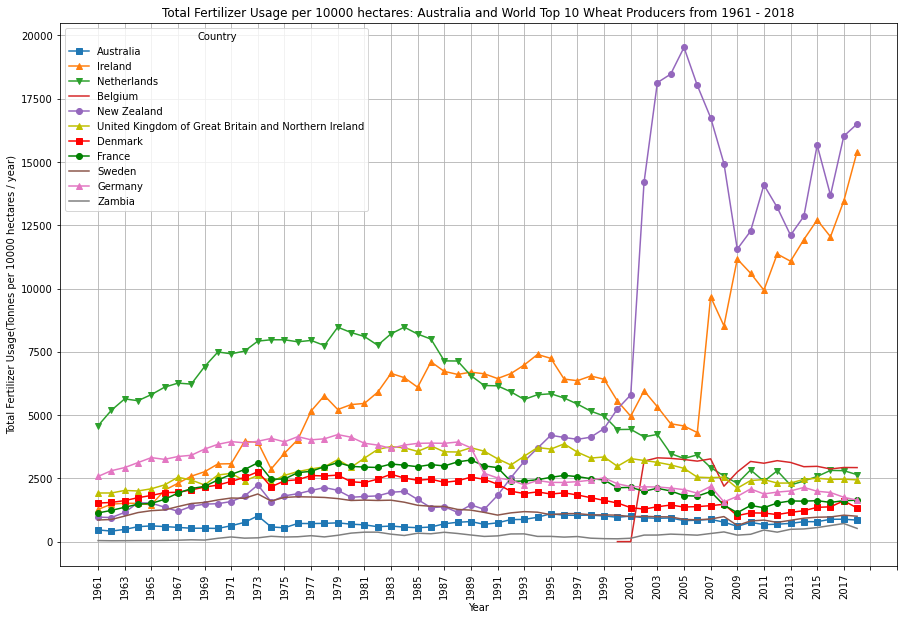

In [89]:
# Transposing the dataframe
result_1a_df = CropL_Fertilizer_df.T

# Select top10 producers based on Q5.  Wheat production only.
columns = ['Australia', 'Ireland', 'Netherlands', 'Belgium', 'New Zealand',
           'United Kingdom of Great Britain and Northern Ireland', 'Denmark', 'France', 'Sweden', 'Germany', 'Zambia']

# Plot only the selected countries.
result_1a_df  = result_1a_df[columns]

# Create a line plot
axes = result_1a_df.plot(
    kind='line',
    title='Total Fertilizer Usage per 10000 hectares: Australia and World Top 10 Wheat Producers from 1961 - 2018',
    ylabel='Total Fertilizer Usage(Tonnes per 10000 hectares / year)',
    xlabel='Year',
    xticks = [x for x in range(0, 62, 2)],
    grid = True,
    rot = 90,
    style = ['s-','^-','v-','-','o-','y^-','rs-','go-','-','^-'],
    legend = True,
    figsize=(15,10)
)

**Answer 9c**

This is interesting to show that New Zealand by far uses the most fertilizers per 10000 hectares followed by Ireland.  It is heartening to see that Australia is quite low on the list.  Netherlands fertilizers usage had steadily declined since 1984.  I have visited Netherlands a few times and it is obvious that they uses cow manures (from the distinct smell in the air) to fertilize their vast expanse of tulip fields.

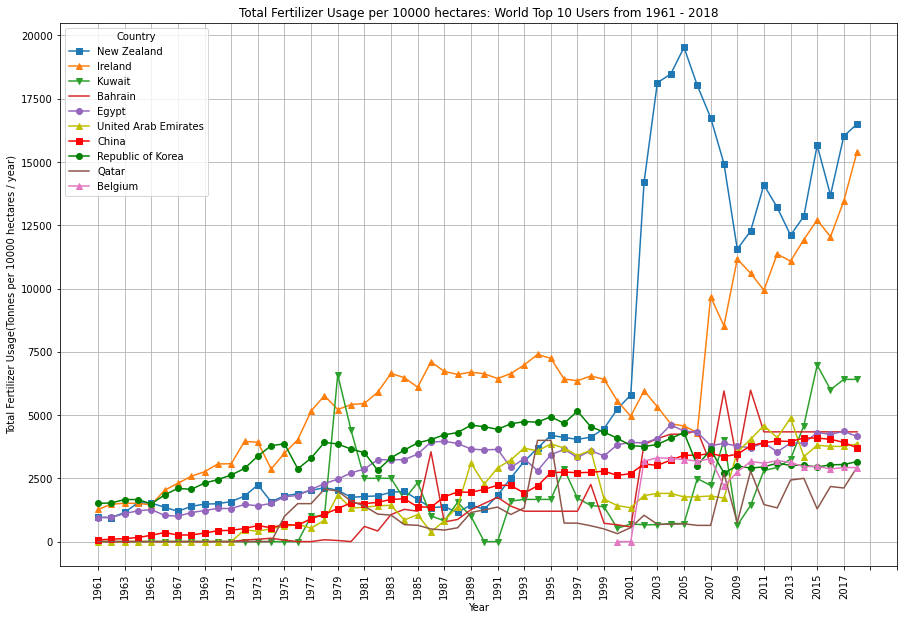

In [90]:
# Select top10 producers based on Q5.  Wheat production only.
result1b_df = CropL_Fertilizer_df.sort_values(by = ['2018'], ascending = False ,)

# Select top 10 and transposing.
result1b_df = result1b_df.iloc[0:10,:]
result1b_df = result1b_df.T

# Create a line plot
axes = result1b_df .plot(
    kind='line',
    title='Total Fertilizer Usage per 10000 hectares: World Top 10 Users from 1961 - 2018',
    ylabel='Total Fertilizer Usage(Tonnes per 10000 hectares / year)',
    xlabel='Year',
    xticks = [x for x in range(0, 62, 2)],
    grid = True,
    rot = 90,
    style = ['s-','^-','v-','-','o-','y^-','rs-','go-','-','^-'],
    legend = True,
    figsize=(15,10)
)

**Answer 9d**

New Zealand and Ireland are the top 2 with large margin over the other top 10 users of fertilizers per 10000 hectares.  Seeing that New Zealand look so green with plants, I didn't expect this.  Australia is not in the top 10.

### **4.10 Answer Question 10: In Australia and the world, how has temperature changes over time from 1961-2019?  Is there relationship between crop production and temperature?**

In [91]:
temperature_df.head(10)

,Country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,-0.121,-0.171,0.841,-0.779,-0.254,0.172,-0.374,-0.375,-0.490,...,1.463,0.283,1.325,0.536,1.166,1.581,1.626,1.682,1.125,0.652
1,Albania,0.639,0.345,0.078,-0.166,-0.388,0.553,-0.082,0.073,-0.024,...,1.133,1.577,1.431,1.357,1.703,1.624,1.286,2.189,1.858,1.671
2,Algeria,0.110,0.042,0.005,0.169,-0.176,0.373,-0.020,-0.062,0.325,...,1.427,1.184,1.211,1.715,1.151,1.776,1.537,1.246,1.127,1.943
3,American Samoa,0.042,-0.080,0.128,-0.178,-0.526,0.218,-0.342,-0.172,0.147,...,0.711,0.732,1.016,0.887,0.726,1.256,1.151,0.905,1.255,1.161
4,Andorra,0.744,0.117,-0.746,0.315,-0.499,0.406,0.620,-0.013,-0.171,...,1.586,1.179,0.748,1.868,1.564,1.845,1.784,1.760,1.800,2.378
5,Angola,0.049,-0.143,-0.181,-0.207,-0.201,0.182,-0.067,-0.191,0.182,...,0.828,0.528,0.970,0.776,1.319,1.733,0.952,1.260,1.752,1.057
6,Anguilla,0.039,0.005,0.203,0.127,-0.344,0.062,-0.220,-0.309,0.299,...,0.327,0.492,0.587,0.611,0.870,0.963,0.702,0.532,0.766,1.154
7,Antarctica,0.280,-0.227,0.136,-0.366,-0.098,-0.240,0.133,-0.088,-0.256,...,0.738,-0.202,1.750,0.559,-0.085,0.229,0.773,1.451,0.638,0.779
8,Antigua and Barbuda,-0.005,0.015,0.252,0.101,-0.409,0.167,-0.152,-0.276,0.263,...,0.382,0.484,0.556,0.487,0.811,0.889,0.665,0.506,0.763,1.098
9,Argentina,0.149,-0.049,0.169,-0.343,0.088,-0.167,0.001,0.479,0.285,...,0.290,0.713,0.370,0.901,0.892,0.417,1.010,0.783,0.664,1.040


In [92]:
australia_temp_df = temperature_df.loc[temperature_df['Country'] == 'Australia']
australia_temp_df = australia_temp_df.T

# Selecting all rows from 2nd row onwards
australia_temp_df = australia_temp_df.iloc[1: ]

#rename the columns
australia_temp_df.columns = ['Temperature Change in degC']
australia_temp_df.head(10)

,Temperature Change in degC
1961,0.151
1962,0.111
1963,-0.122
1964,-0.042
1965,0.114
1966,-0.253
1967,-0.104
1968,-0.208
1969,0.099
1970,-0.01


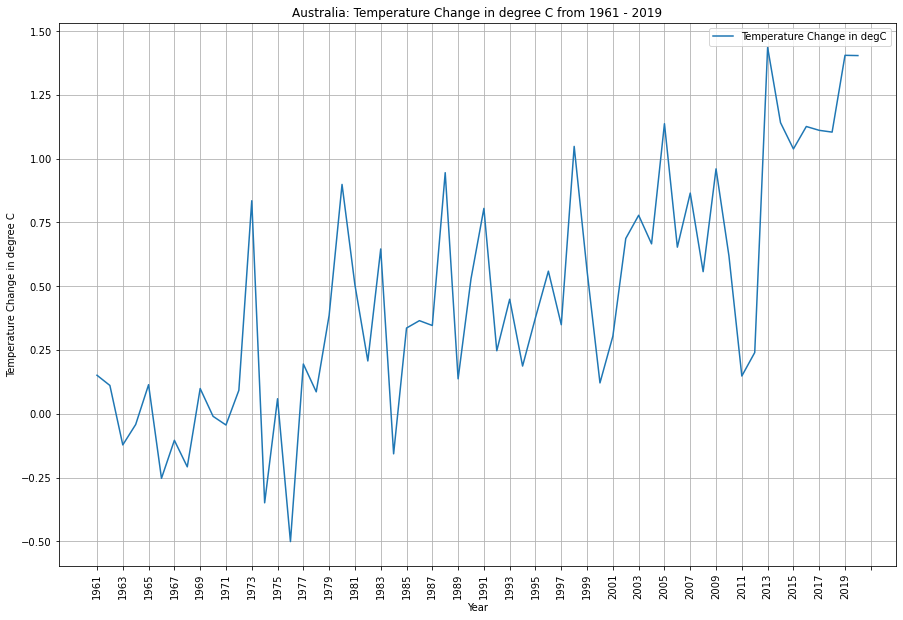

In [93]:
# Create a line plot for Australia change of temperature.
axes = australia_temp_df.plot(
    kind='line',
    title='Australia: Temperature Change in degree C from 1961 - 2019',
    ylabel='Temperature Change in degree C',
    xlabel='Year',
    xticks = [x for x in range(0, 62, 2)],
    grid = True,
    rot = 90,
  #  style = ['s-','-','v-','-','o-','y^-','rs-','go-','-','^-'],
    legend = True,
    figsize=(15,10)
)

**Answer 10a**

Look like there has been steady increase of temperature from 1961 to 2020 of about 1.5 degC increase.  How about the rest of the world?

In [94]:
world_temp_df = temperature_df.set_index('Country')
world_temp_df = world_temp_df.T


world_temp_df.head(10)

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Argentina,...,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wake Island,Wallis and Futuna Islands,Western Sahara,Yemen,Yugoslav SFR,Zambia,Zimbabwe
1961,-0.121,0.639,0.110,0.042,0.744,0.049,0.039,0.280,-0.005,0.149,...,0.211,0.106,0.022,0.0,0.345,0.514,0.034,0.930,0.237,0.265
1962,-0.171,0.345,0.042,-0.080,0.117,-0.143,0.005,-0.227,0.015,-0.049,...,0.122,-0.093,-0.234,0.0,-0.029,0.457,-0.005,-0.089,-0.160,0.236
1963,0.841,0.078,0.005,0.128,-0.746,-0.181,0.203,0.136,0.252,0.169,...,-0.145,0.011,-0.311,0.0,0.147,0.241,0.171,-0.267,-0.390,-0.463
1964,-0.779,-0.166,0.169,-0.178,0.315,-0.207,0.127,-0.366,0.101,-0.343,...,0.230,0.071,0.079,0.0,0.199,0.726,-0.250,-0.483,-0.279,-0.107
1965,-0.254,-0.388,-0.176,-0.526,-0.499,-0.201,-0.344,-0.098,-0.409,0.088,...,-0.535,-0.114,-0.025,0.0,-0.400,-0.439,-0.621,-0.527,-0.417,-0.486
1966,0.172,0.553,0.373,0.218,0.406,0.182,0.062,-0.240,0.167,-0.167,...,-0.227,0.224,0.481,0.0,0.059,0.222,0.091,0.690,0.298,0.203
1967,-0.374,-0.082,-0.020,-0.342,0.620,-0.067,-0.220,0.133,-0.152,0.001,...,-0.113,-0.226,-0.127,0.0,-0.244,0.058,-0.254,0.275,-0.011,-0.060
1968,-0.375,0.073,-0.062,-0.172,-0.013,-0.191,-0.309,-0.088,-0.276,0.479,...,-0.277,-0.174,-0.308,0.0,-0.083,-0.303,-0.252,0.189,-0.123,0.077
1969,-0.490,-0.024,0.325,0.147,-0.171,0.182,0.299,-0.256,0.263,0.285,...,0.019,0.542,0.529,0.0,-0.189,0.397,0.254,-0.219,0.252,0.204
1970,0.852,-0.127,0.130,-0.033,0.093,0.245,0.050,-0.133,0.063,0.430,...,0.307,0.172,-0.072,0.0,0.071,0.557,0.379,-0.312,0.367,0.412


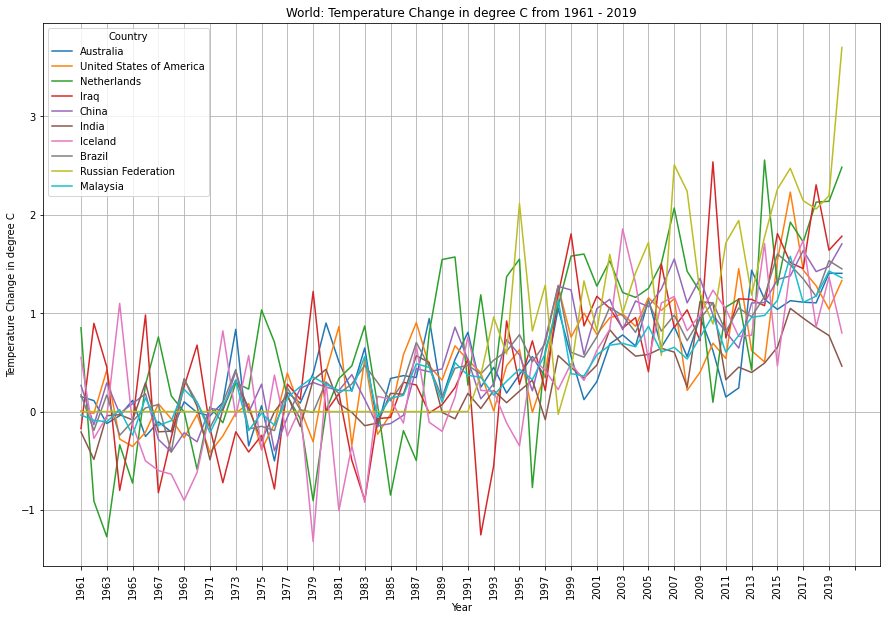

In [95]:
# Select representative country per continent.
columns = ['Australia', 'United States of America', 'Netherlands', 'Iraq',
           'China', 'India', 'Iceland', 'Brazil', 'Russian Federation', 'Malaysia']
world_temp_df = world_temp_df[columns]

# Create a line plot
axes = world_temp_df.plot(
    kind='line',
    title='World: Temperature Change in degree C from 1961 - 2019',
    ylabel='Temperature Change in degree C',
    xlabel='Year',
    xticks = [x for x in range(0, 62, 2)],
    grid = True,
    rot = 90,
    legend = True,
    figsize=(15,10)
)

**Answer 10b**

The upward temperature trend is evidence from select representative countries around the world.  The steady increase is a major concern for our world and we know crops tend to thrive in certain temperature condition.  Hopefully, this is a short term trend as has been seen in geological time scale.  Regardless, the effort to reduce global warming and plant more trees will certainly help to eleviate this condition.

### **4.11 Answer Question 11: In 2018, how many and what percentage of the crop lands are actually irrigated in the world?**

Cropland includes land planted in vegetables and fruits while agricultural land includes arable land, permanent crops and permanent pastures (for animal) (Ritchie and Roser 2019).


In [96]:
# Select irrigated cropland for 2018 for all countries and drop row with value = 0.0000.
crop_land_df = land_df.set_index('Country')
crop_land_df = crop_land_df[['Type', '2018']]
crop_land_irrigated_df = crop_land_df.loc[(crop_land_df['Type'] == 'Cropland area actually irrigated')]
crop_land_irrigated_df = crop_land_irrigated_df.loc[crop_land_irrigated_df['2018'] != 0.0000]

crop_land_irrigated_df.head(5)

,Type,2018
Country,,
Albania,Cropland area actually irrigated,176.0
Armenia,Cropland area actually irrigated,100.0
Australia,Cropland area actually irrigated,1425.0
Azerbaijan,Cropland area actually irrigated,1390.4
Belarus,Cropland area actually irrigated,24.8


In [97]:
# Select cropland data for 2018 for all countries.
cropland_df = crop_land_df.loc[(crop_land_df['Type'] == 'Cropland')]
cropland_df

,Type,2018
Country,,
Afghanistan,Cropland,7919.000
Albania,Cropland,696.000
Algeria,Cropland,8517.017
American Samoa,Cropland,4.900
Andorra,Cropland,0.830
...,...,...
Western Sahara,Cropland,4.000
Yemen,Cropland,1387.700
Yugoslav SFR,Cropland,0.000


In [98]:
# Merge the two dataframe.
crop_land_irrigated_df = crop_land_irrigated_df.merge(cropland_df, how='left', on='Country')
crop_land_irrigated_df.head(5)

,Type_x,2018_x,Type_y,2018_y
Country,,,,
Albania,Cropland area actually irrigated,176.0,Cropland,696.0
Armenia,Cropland area actually irrigated,100.0,Cropland,504.7
Australia,Cropland area actually irrigated,1425.0,Cropland,31306.0
Azerbaijan,Cropland area actually irrigated,1390.4,Cropland,2352.9
Belarus,Cropland area actually irrigated,24.8,Cropland,5823.0


In [99]:
# Calculate the percentage irrigated for 2018 per country.
crop_land_irrigated_df['Percent_irrigated'] = crop_land_irrigated_df['2018_x'] / crop_land_irrigated_df['2018_y'] * 100
crop_land_irrigated_df.sort_values(by='Percent_irrigated', ascending=False).reset_index()

,Country,Type_x,2018_x,Type_y,2018_y,Percent_irrigated
0,United Arab Emirates,Cropland area actually irrigated,81.7000,Cropland,81.75,99.938838
1,Uzbekistan,Cropland area actually irrigated,3609.9000,Cropland,4462.50,80.894118
2,Kyrgyzstan,Cropland area actually irrigated,939.4000,Cropland,1365.00,68.820513
3,Qatar,Cropland area actually irrigated,11.0000,Cropland,17.00,64.705882
4,Azerbaijan,Cropland area actually irrigated,1390.4000,Cropland,2352.90,59.093034
5,Ecuador,Cropland area actually irrigated,820.0000,Cropland,2354.00,34.834325
6,Malta,Cropland area actually irrigated,3.5000,Cropland,10.38,33.718690
7,Jordan,Cropland area actually irrigated,84.4000,Cropland,279.80,30.164403
8,Albania,Cropland area actually irrigated,176.0000,Cropland,696.00,25.287356
9,Dominican Republic,Cropland area actually irrigated,298.0795,Cropland,1232.00,24.194765


Only 23 countries actually have cropland irrigated in this list from FAO and it is not surprising to see the top 5 spots are arid related area.  UAE copland is almost 100% irrigated.  Australia is at no.14 with 4.5% cropland irrigated.  None of the other top producing countries are in this list.  Let's look at the dataset over the years.

In [100]:
# Select all data with irrigated for all the years.
cropland_df = land_df.loc[(land_df['Type'] == 'Cropland area actually irrigated')]
cropland_df = cropland_df.set_index('Country')
cropland_df = cropland_df.sort_values(by='2018', ascending=False)
cropland_df = cropland_df.drop(['Type'], axis=1)
cropland_df = cropland_df.T
cropland_df

Country,Uzbekistan,Australia,Azerbaijan,Kyrgyzstan,Ecuador,Ethiopia,Ukraine,Dominican Republic,Romania,Republic of Moldova,...,Iran (Islamic Republic of),Ireland,Malaysia,Israel,Japan,Kenya,Kuwait,Bulgaria,Lebanon,Mali
1961,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1962,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1963,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1964,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1965,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1966,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1967,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1968,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1969,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1970,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


This dataset look incomplete.  Lots of missing cells so unfortunately not able to use this to draw meaningful conclusion.

### **5. Conclusions and Discussion**

Overall, the results of this analysis highlight the impact of less than ideal amount of average rainfall for Australia.   Australia had been dubbed 'The Dry Continent" (Kennedy 1983) before and the historical plots compared to the major producers of the world and world map affirm this.  Australia is getting an average of 40MM/year which is probably the single most important factor why Australia's yield and production is much lower than compared to the other countries.  The top crops producer countries are getting in the 60-100MM/year and some at 150MM/year.  Furthermore, Australia often suffer from drought which has immediate impact on crop production as have been observed from the production and rainfall plot over time.  Having only 4.5% of the cropland irrigated doesn't even come close to overcome the impact of drought and being in an arid zone.  Much of the country is actually lies within an arid zone and going by UAE example, we should be irrigating croplands in much bigger scale.  Unfortunately, we don't have enough water reservoir from lakes and groundwater to do so (Campbell 2020).  Furthermore, the dry trend for Australia continent had been predicted to continue and even become worst in the future (Liu 2007 & Crosbie et al 2013).

The powerhouse for crops production are China, India, USA and Brazil with combined total of about 50%.  These countries are getting sufficient rain.  So much so that they don't really need help from irrigation. Judging from the total fertilizer usage, their soils are fertile enough to sustain their crops production.  The exception to this observation is China which has seen steady increase of fertilizer usage per 10000 hectares over the year.  There is a danger of over reliance on a few countries to feed the world.  Other countries need to start producing more else they would become too dependent on these countries.   

We are not able to examine the nutrients level in the croplands in each country since the dataset used doesn't have those information.  However, judging from the increase uses of fertilizers in Australia over the years with increase area harvest suggest that our soil need improvement to support plant growth.  We are still relatively low in term of usage per 10000 hectares compared to other countries.  Perhaps, we can encourage the use of organic fertilizers such as animal manures like Netherlands.

One worrying trend is the increase of temperature around the world.  An average of 1.5 degree C had increased from 1961 to 2019.  We do not know the full impact of this temperature increase to crops yield and production.  We do know each crops thrives in certain temperature and perhaps they will evolve over time to endure higher temperature.  This remain to be seen.  But if this trend continue, it might be too late when crops started to die and the world would be without a lot of the well known food now.  We do know that in geologic time scale, temperature did fluctuate a lot.  Regardless, anything that we can do to reverse or at least slow down this change through tree planting, reduce CO2 emission, use of greener energy sources are certainly welcome.

For small countries that might have cropland limitation, choosing mushroom and truffles with such high yielding crops might be one of the solution. Mushroom can be planted outdoor or indoor with the high yielding ones grown in highly controlled environment (Barney 1997).

This study was trigger by my interest to investigate Australia wheat yield compared to the rest of the world.  Unfortunately, it is confirm that our wheat yield sit at no. 93 position out of 100 producers.  Even with this low yield we are producing a lot (no. 12 in the world) because we plant over large area (no.6 in the world).  So, we just have to make do with what we have especially in growing wheat and accept the fact that our crops will not yield as much as other countries. 

Finally, we took it by faith that the data we used for this study are accurate and reliable.  The conclusions of this study will only be as good as the quality of the data.  

### **6. Future Analysis**

I was not able to use the crops price dataset from FAO to analyse the potential link between crop prices and production.  We have seen higher crop prices serve as incentive to improve crop supply as expected (Haile 2016).  The same study also show that the high volatility of crop prices acts as a disincentive.  It would be interesting to see whether the dataset would support these findings.  

It would have been useful to have more granularity in the dataset such as what fertilizers were used for which crops.  This will help to have better understanding of the relationship between production and fertilizers.

The rain fall data is also too generic because it covers such a large area like the whole of Australia.  For larger countries, it would have been beneficial to have data separated by region.

Some potential future analysis may include: 

* Analyse the link between crop prices and production.  May adjust the prices to take into account the effect of inflation.
* Find out whether it is really worth spending all the money in fertilizers. What is the return on investment?  Would organic fertilizers be more economical and sustainable?
* Since mushroom and truffles are such high yielding crop, would it be beneficical for Australia to go on a larger scale like Netherlands?

### **7. References**

Food and Agriculture Organization of the United Nations. FAOSTAT. (Mar 2021). *Production_Crops_E_All_Data_NOFLAG.csv.* <br>Available at: http://www.fao.org/faostat/en/#data/QC [Assessed 23 Jul 2021].

Worldbank data for monthly average rainfall from 1961-2020. (2021). *Worldbank_Rainfall_1961_1990_ed.csv and Worldbank_Rainfall_1991_2020_ed.csv* <br>Available at: https://climateknowledgeportal.worldbank.org/download-data [Assessed 8 August 2021].

Food and Agriculture Organization of the United Nations. FAOSTAT. (Mar 2021). *Inputs_FertilizersNutrient_E_All_Data_NOFLAG_ed.csv.* <br>Available at: http://www.fao.org/faostat/en/#data/RFN [Assessed 23 Jul 2021].

Food and Agriculture Organization of the United Nations. FAOSTAT. (Mar 2021). *Inputs_LandUse_E_All_Data_NOFLAG_ed.csv.* <br>Available at: http://www.fao.org/faostat/en/#data/RL [Assessed 23 Jul 2021].

Food and Agriculture Organization of the United Nations. FAOSTAT. (Mar 2021). *Population_E_All_Data_NOFLAG.csv* <br>Available at: http://www.fao.org/faostat/en/#data/OA [Assessed 23 Jul 2021].

Food and Agriculture Organization of the United Nations. FAOSTAT. (Mar 2021). *Environment_Temperature_change_E_All_Data_NOFLAG.csv* <br>Available at: http://www.fao.org/faostat/en/#data/ET [Assessed 23 Jul 2021].

GeoPandas developers (2019). *Plotting with Geoplot and GeoPandas — GeoPandas 0.8.0 documentation*. [online] geopandas.org. <br>Available at: https://geopandas.org/gallery/plotting_with_geoplot.html [Accessed 5 Aug. 2021].

Calla Wahlquist, 2019. *Australia to import wheat for first time in 12 years as drought eats into grain production.  The Guardian.*<br>
https://www.theguardian.com/australia-news/2019/may/15/australia-to-import-wheat-for-first-time-in-12-years-as-drought-eats-into-grain-production [Assessed 14 Aug 2021]

University of Illinois, 2021. *The Great Plant Escape.*<br>
https://web.extension.illinois.edu/gpe/case1/c1facts3a.html [Assessed 16 Aug 2021].

Kennedy, MR 1983, ‘The Dry Continent’, *Weatherwise*, vol. 36, no. 3, pp. 122–125.

Liu, N, Harper, R., Dell, B, Liu, S & Yu, Z 2017, ‘Vegetation dynamics and rainfall sensitivity for different vegetation types of the Australian continent in the dry period 2002–2010’, *Ecohydrology*, vol. 10, no. 2, p. n/a–n/a.

Crosbie, RS, Pickett, T, Mpelasoka, FS, Hodgson, G, Charles, SP & Barron, OV 2013, ‘An assessment of the climate change impacts on groundwater recharge at a continental scale using a probabilistic approach with an ensemble of GCMs’, *Climatic change*, vol. 117, no. 1, pp. 41–53.

Haile, MG, Kalkuhl, M & Braun, J 2016, ‘Worldwide Acreage and Yield Response to International Price Change and Volatility: A Dynamic Panel Data Analysis for Wheat, Rice, Corn, and Soybeans’, *American journal of agricultural economics*, vol. 98, no. 1, pp. 172–190.

Barney, D 1997. Growing Mushroom Commecially - Risk and Opportunities.   *University of Idaho College of Agriculture.*<br>
https://www.extension.uidaho.edu/publishing/pdf/CIS/CIS1077.pdf [Assessed 16-Aug-2021]

Campbell, M 2020. Australia's Water Is Vanishing. *Bloomberg Businessweek.*<br>
https://www.bloomberg.com/features/2020-australia-drought-water-crisis/ [Assessed 16 Aug 2021].

Food and Agriculture Organization of the United Nations. FAOSTAT. *Cropland.*<br>
http://www.fao.org/3/Y4171E/Y4171E20.htm [Assessed 11 Aug 2021].

Food and Agriculture Organization of the United Nations. FAOSTAT. *Agriculture.*<br>
http://www.fao.org/ag/agn/nutrition/Indicatorsfiles/Agriculture.pdf [Assessed 11 Aug 2021].


Richie and Rose 2019, *Our World in Data. Land Use.*<br>
https://ourworldindata.org/land-use[Assessed 11 Aug 2021].